# *“数据分析 ”至“模型融合”为参考代码*

参考出处：https://tianchi.aliyun.com/forum/postDetail?spm=5176.12586969.1002.21.3cf2170epYn0xP&postId=188681

*赛题：心电图心跳信号多分类预测*

# *Load Google Drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 问题分析（Task_1)

典型的单变量时间序列分类问题

# 数据分析（Task_2)

## 通用流程

1. 载入数据科学和可视化的包：
    * pandas, numpy, scipy, matplotlib, seaborn
2. 加载数据：
    * 加载train和test数据集，简略观察数据（.head()和.shape）
3. 数据总览：
    * 通过.describe()熟悉数据相关的统计量， 通过.info()熟悉数据类型
4. 判断数据缺失和异常：
    * 按列查看nan值存在情况，异常值检测
5. 了解预测值的分布：
    * 总体分布，查看skewness和kurtosis，预测值的具体频数

必要的配置

In [ ]:
!pip install missingno

## 2. 代码实现

### 1 载入数据科学库和可视化库

In [ ]:
### 1 载入数据科学库和可视化库
# coding:utf-8

import warnings
warnings.filterwarnings('ignore')  # 过滤并忽略警告语句

import pandas as pd 
import numpy as np
import missingno as msno
from pandas import DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns


### 2 载入train和test数据集

In [ ]:
### 2 载入train和test数据集
#----------------------- 本地加载 -----------------------
Train_data = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/train.csv')
Test_data = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/testA.csv')


#----------------------- Web端加载 -----------------------
# 从tmp网盘加载文件进行查看数据（限本地jupyter notebook）
import csv
import pandas as pd
from io import StringIO
from urllib import request
import pandas as pd

# 基于tmp.link分享链接直接加载文件
def get_data_from_tmp_web(url):
  file_mark = url[-13:]
  base_url = 'https://tmplinkapp-connect.vx-cdn.com/connect-tz6rhexhflovcrsiq7w5-'
  download_link = base_url + file_mark

  s = request.urlopen(download_link).read().decode('utf8')  # 1 读取数据串

  dfile = StringIO(s)      # 2 将字符串转换为 StringIO对象，使其具有文件属性 
  creader = csv.reader(dfile)  # 3 将流 转换为可迭代的 reader（csv row）
  dlists=[rw for rw in creader]  # 4 其他转换、操作

  temp = []
  for i in range(len(dlists)):
    row_int = [float(j) for j in dlists[i][0].split( )]
    temp.append(row_int)

  df = pd.DataFrame(temp, columns=['voltage_input', 'voltage_output', 'value_tachometer'])
  # print(df.head())

  return df

Train_data = get_data_from_tmp_web('http://tmp.link/f/60b15fc318681')
Test_data = get_data_from_tmp_web('http://tmp.link/f/60b15fc193212')


# 观察首尾数据
print('Train首尾数据及shape：\n', Train_data.head().append(Train_data.tail()),'\n',  Train_data.shape)

print('Test首尾数据及shape：\n', Test_data.head().append(Test_data.tail()), '\n', Test_data.shape)


Train首尾数据及shape：
           id                                  heartbeat_signals  label
0          0  0.9912297987616655,0.9435330436439665,0.764677...    0.0
1          1  0.9714822034884503,0.9289687459588268,0.572932...    0.0
2          2  1.0,0.9591487564065292,0.7013782792997189,0.23...    2.0
3          3  0.9757952826275774,0.9340884687738161,0.659636...    0.0
4          4  0.0,0.055816398940721094,0.26129357194994196,0...    2.0
99995  99995  1.0,0.677705342021188,0.22239242747868546,0.25...    0.0
99996  99996  0.9268571578157265,0.9063471198026871,0.636993...    2.0
99997  99997  0.9258351628306013,0.5873839035878395,0.633226...    3.0
99998  99998  1.0,0.9947621698382489,0.8297017704865509,0.45...    2.0
99999  99999  0.9259994004527861,0.916476635326053,0.4042900...    0.0 
 (100000, 3)
Test首尾数据及shape：
            id                                  heartbeat_signals
0      100000  0.9915713654170097,1.0,0.6318163407681274,0.13...
1      100001  0.6075533139615096,0.5417

### 3 总览数据

In [ ]:
### 3 总览数据（ data.describe() --> 获取数据的统计量， data.info() --> 获取数据类型
print('数据的统计量：\n', Train_data.describe())
print('数据类型信息：\n', Train_data.info())

print('数据的统计量：\n', Test_data.describe())
print('数据类型信息：\n', Test_data.info())


数据的统计量：
                   id          label
count  100000.000000  100000.000000
mean    49999.500000       0.856960
std     28867.657797       1.217084
min         0.000000       0.000000
25%     24999.750000       0.000000
50%     49999.500000       0.000000
75%     74999.250000       2.000000
max     99999.000000       3.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   heartbeat_signals  100000 non-null  object 
 2   label              100000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB
数据类型信息：
 None
数据的统计量：
                   id
count   20000.000000
mean   109999.500000
std      5773.647028
min    100000.000000
25%    104999.750000
50%    109999.500000
75%    114999.250000
max    119999.000000
<class 'pandas.core.frame.DataFrame'>
R

### 4 判断数据缺失和异常

In [ ]:
### 4 判断数据缺失和异常（data.isnull().sun() --> 按列查看nan存在情况）
print('数据缺失与异常情况：\n', Train_data.isnull().sum())
print('数据缺失与异常情况：\n', Test_data.isnull().sum())

数据缺失与异常情况：
 id                   0
heartbeat_signals    0
label                0
dtype: int64
数据缺失与异常情况：
 id                   0
heartbeat_signals    0
dtype: int64


### 5 了解预测值的分布

0.0    64327
3.0    17912
2.0    14199
1.0     3562
Name: label, dtype: int64
Skewness: 0.871005
Kurtness: -1.009573
偏度：
 id       0.000000
label    0.871005
dtype: float64 
峰度：
 id      -1.200000
label   -1.009573
dtype: float64


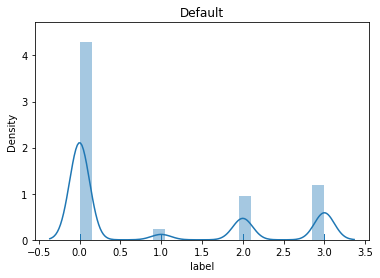

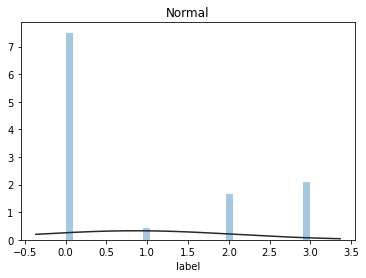

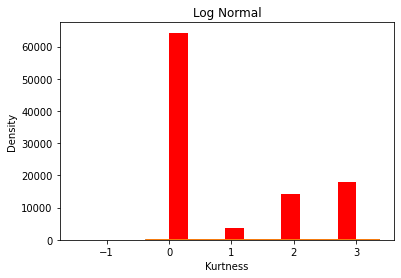

In [ ]:
### 5 了解预测值的分布
print(Train_data['label'].value_counts())

# 1)总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['label']
plt.figure(1)
plt.title('Default')
sns.distplot(y, rug=True, bins=20)
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

# 2) 查看skewness and kurtosis --> 偏度和峰度
# 偏度系数等于0为正态，大于零为右偏（负偏），小于零为左偏（负偏）；
# 峰度系数等于3为正态，大于3为尖峰，小于3为平顶；
sns.distplot(y)
print('Skewness: %f' % y.skew())
print('Kurtness: %f' % y.kurt())

print('偏度：\n', Train_data.skew(), '\n峰度：\n', Train_data.kurt())

sns.distplot(y.kurt(), color='orange', axlabel='Kurtness')

# 3) 查看预测值的具体频数
plt.hist(y, orientation='vertical', histtype='bar', color='red')
plt.show()

### 6 用pandas_profiling做EDA

In [ ]:
# Colab上的pandas_profiling版本有些老旧，需要更新到最新版（具体更新的操作可能需要执行两次）
!pip install --upgrade pandas_profiling 

     |████████████████████████████████| 245kB 8.3MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 3.2MB 13.3MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 1.1MB 35.8MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 296kB 48.0MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=9b926be9d6a1b275d0a15272ba6980440cc06f63322c10a211381a5bb868e6a4
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=8ec48c4ea96904174c45990f4f7b01767521ad59a88e3b985d5006d3ae2e7e51
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but y

In [ ]:
### 6 用pandas_profiling生成数据报告
import pandas_profiling
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file('/content/drive/MyDrive/CLF_of_ECG_signals/Exploratory_Data_Analysis/example.html')


Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 特征工程（Task_3）

特征预处理、涉及Tsfresh的使用

## 通用流程

1. 数据预处理
  * 时间序列数据格式处理
  * 加入时间步特征time
2. 特征工程
  * 时间序列特征构造
  * 特征筛选
  * 实用tsfresh进行实践序列特征处理

## 代码实现

### 数据预处理

In [ ]:
!pip install tsfresh==0.17.0 # 高版本的tsfresh对scipy有要求，Colab升级scipy有困难，所以安装指定低版本的tsfresh

     |████████████████████████████████| 92kB 3.7MB/s 
  Found existing installation: tsfresh 0.18.0
    Uninstalling tsfresh-0.18.0:
      Successfully uninstalled tsfresh-0.18.0


In [ ]:
# 导入必要的包
import pandas as pd
import numpy as np
import tsfresh as tsf
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

# 读取数据
Train_data = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/train.csv')
Test_data = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/testA.csv')

In [ ]:
### 数据预处理

# 对心电特征进行转列处理，同时为每个心电信号加入时间步特征time
train_heartbeat_df = Train_data['heartbeat_signals'].str.split(',',expand=True).stack()
# print(train_heartbeat_df.shape)
train_heartbeat_df.head().append(train_heartbeat_df.tail())
train_heartbeat_df = train_heartbeat_df.reset_index()
train_heartbeat_df = train_heartbeat_df.set_index('level_0')
train_heartbeat_df.index.name = None
train_heartbeat_df.rename(columns={'level_1':'time', 0:'heartbeat_signals'}, inplace=True)
train_heartbeat_df['heartbeat_signals'] = train_heartbeat_df['heartbeat_signals'].astype(float)

train_heartbeat_df.head().append(train_heartbeat_df.tail())

# 将处理后的心电特征加到训练数据中，同时将训练数据label列单独存储
train_label = Train_data['label']

# 重构Train_data,并保存为train_data
train_data = Train_data.copy()
train_data = train_data.drop('label',axis=1)
train_data = train_data.drop('heartbeat_signals',axis=1)
train_data = train_data.join(train_heartbeat_df)

train_data.head().append(Train_data.tail())

# 查看数据的层级关系
train_data[train_data['id']==1]

,id,time,heartbeat_signals
1,1,0,0.971482
1,1,1,0.928969
1,1,2,0.572933
1,1,3,0.178457
1,1,4,0.122962
...,...,...,...
1,1,200,0.000000
1,1,201,0.000000
1,1,202,0.000000
1,1,203,0.000000


### 特征工程

时序分析，大多需要建立时间序列上的特征

其他的则需要频域或者其他物理特征


In [ ]:
#### 特征抽取（By tsfresh)
from tsfresh import extract_features

'''
因为extract_features提供了几个特征提取的方式default_fc_parameters：
①None、②ComprehensiveFCParameters()、③EfficientFCParameters()、④MinimalFCParameters()
③④虽然是基于②计算得来，但计算要快很多，因为④指定了特征计算类型，③去除了耗时的特征计算类型
采用④完成特征抽取，以获取小规模的特征集合 --> result: time_cost:02:16, scale:[100000 rows x 9 columns]
采用③完成特征抽取，以获取规模不那么大的特征集合 --> result: time_cost: over 12 minutes Storage_cost: over 8GB scale: No result.
'''
from tsfresh.feature_extraction import ComprehensiveFCParameters, EfficientFCParameters, MinimalFCParameters
settings = ComprehensiveFCParameters()
train_features = extract_features(train_data, column_id='id', \
                  column_sort='time', default_fc_parameters=settings)
print(train_features)

train_features.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Features_Extract/extract_features_ComprehensiveFCParameters.csv')


Feature Extraction:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
### 特征选择（By impute & select_features)
'''
select_features 检查特征矩阵X的所有特征(列)的重要性，并返回一个可能简化的只包含相关特征的特征矩阵。
'''
from tsfresh.utilities.dataframe_functions import impute
impute(train_features)  # 去除Nan值

train_features_filtered = select_features(train_features, train_label)  # 
print(train_features_filtered)

train_features_filtered.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Features_Extract/train_features_filtered_MinimalFCParameters.csv')

       heartbeat_signals__sum_values  ...  heartbeat_signals__minimum
0                          38.927945  ...                         0.0
1                          19.445634  ...                         0.0
2                          21.192974  ...                         0.0
3                          42.113066  ...                         0.0
4                          69.756786  ...                         0.0
...                              ...  ...                         ...
99995                      63.323449  ...                         0.0
99996                      69.657534  ...                         0.0
99997                      40.897057  ...                         0.0
99998                      42.333303  ...                         0.0
99999                      53.290117  ...                         0.0

[100000 rows x 8 columns]


In [ ]:
# 学习和测试extract_features用法
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import pandas as pd

x = np.array([i*0.01 for i in range(0, 640, 5)])
x_ = [i for i in range(8)]*16
print(x_)
id = [[i]*8 for i in range(16)]
id = [n for i in id for n in i]
print(id)

ts = [math.sin(i) for i in x]
# print(ts)

# plt.plot(ts)
from tsfresh import extract_features
df_sin = pd.DataFrame(ts)
df_sin['time_xcc'] = x_
df_sin['id'] = id
df_sin.rename(columns={0:'value'},inplace=True)
df_sin = df_sin.reset_index()
df_sin = df_sin.set_index('id',drop=False)

print(df_sin.head(20))

from tsfresh.feature_extraction import ComprehensiveFCParameters, EfficientFCParameters, MinimalFCParameters
settings = ComprehensiveFCParameters()

train_features = extract_features(df_sin, column_id='value',chunksize=10, \
                  column_sort='time_xcc',default_fc_parameters=settings)
print(train_features)

# 去除全NaN列和全0值列（从1576列特征缩减到58列特征）
df_ = train_features.copy()
df_.dropna(axis=1,how='any',inplace=True) 
df_ = df_.loc[:, (df_ != 0.0).any(axis=0)]
print(df_.tail())
print(df_.shape)

# 模型调参（Task_4)

## 通用流程

1. 常用模型介绍：
  * 逻辑回归模型
  * 树模型
  * 集成模型
2. 模型建立与性能评估：
  * 模型建立
  * 评估方法
  * 评估结果
3. 模型调参：
  * 贪心调参
  * 网格调参
  * 贝叶斯调参

1.和2.中的理论知识参见[ *零基础入门数据挖掘-心跳信号分类预测_Task4 模型调参*](https://tianchi.aliyun.com/forum/postDetail?spm=5176.12282027.0.0.7c2d379cVEtyfx&postId=195837)

## 代码实现

### 导入依赖包和和设置

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, make_scorer
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier

import os
import seaborn as sns
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings('ignore')

### 数据预处理

In [ ]:
# reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
# 读取数据
data = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/train.csv')
data_features_filtered = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Features_Extract/train_features_filtered_MinimalFCParameters.csv')

# 数据预处理(得到用于建模的原始特征DataFrame)
data_list = []
for items in data.values:
  data_list.append([items[0]] + [float(i) for i in items[1].split(',')] + [items[2]])

data = pd.DataFrame(np.array(data_list))
data.columns = ['id'] + ['s_'+str(i) for i in range(len(data_list[0])-2)] + ['label']
print(data.head())
data = reduce_mem_usage(data)
print('原始特征数据:\n',data)

# 数据预处理（得到用于建模的时序特征DataFrame）
data_features_filtered['label'] = data['label']
data_features_filtered.rename(columns={'Unnamed: 0':'id'}, inplace=True)
# print(data_features_filtered.shape, '\n', data_features_filtered)
data_features_filtered = reduce_mem_usage(data_features_filtered)
print('时序特征数据：\n', data_features_filtered)


    id       s_0       s_1       s_2  ...  s_202  s_203  s_204  label
0  0.0  0.991230  0.943533  0.764677  ...    0.0    0.0    0.0    0.0
1  1.0  0.971482  0.928969  0.572933  ...    0.0    0.0    0.0    0.0
2  2.0  1.000000  0.959149  0.701378  ...    0.0    0.0    0.0    2.0
3  3.0  0.975795  0.934088  0.659637  ...    0.0    0.0    0.0    0.0
4  4.0  0.000000  0.055816  0.261294  ...    0.0    0.0    0.0    2.0

[5 rows x 207 columns]
Memory usage of dataframe is 157.93 MB
Memory usage after optimization is: 39.67 MB
Decreased by 74.9%
原始特征数据:
             id       s_0       s_1       s_2  ...  s_202  s_203  s_204  label
0          0.0  0.991211  0.943359  0.764648  ...    0.0    0.0    0.0    0.0
1          1.0  0.971680  0.929199  0.572754  ...    0.0    0.0    0.0    0.0
2          2.0  1.000000  0.958984  0.701172  ...    0.0    0.0    0.0    2.0
3          3.0  0.975586  0.934082  0.659668  ...    0.0    0.0    0.0    0.0
4          4.0  0.000000  0.055817  0.261230  ...    0

### 数据建模

注：以下建模的据集并未构造任何特征，直接使用原特征。本次主要任务还是模建模调参。

#### 预操作

分离数据，交叉验证设置，自定义评价指标等

In [ ]:
### 建模前的预操作
# 导入特征工程的结果
'''如果使用时序特征数据执行以下代码'''
data = data_features_filtered

# 分离数据集，方便进行交叉验证
from sklearn.model_selection import KFold
X_train = data.drop(['id','label'], axis=1)   
y_train = data['label']
# 5折交叉验证
folds = 5
seed = 2021
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

# 自定义评价指标（必要的话） 
def f1_score_vali(preds, data_vali):
  labels = data_vali.get_label()
  preds = np.argmax(preds.reshape(4, -1), axis=0)
  score_vali = f1_score(y_true=labels, y_pred=preds, average='macro')
  return 'f1_score', score_vali, True

#### 建模、训练、验证

（By lightgbm）

In [ ]:
### 使用lightgbm建模
'''对训练集数据进行划分，分成训练集和验证集，并进行相应操作'''
from sklearn.model_selection import train_test_split
import lightgbm as lgb
'''数据集划分'''
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

params = {
    'learning_rate': 0.1,
    'boosting': 'gbdt',
    'lambda_l2': 0.1,
    'max_depth': -1,
    'num_leaves': 128,
    'bagging_fraction': 0.8,
    'feature_fraction':0.8,
    'metric': None,
    'objective': 'multiclass',
    'num_class': 4,
    'nthread': 10,
    'verbose': -1,
}

### 使用lightgbm训练
'''使用训练集数据进行模型训练'''
model = lgb.train(params,
          train_set=train_matrix,
          valid_sets=valid_matrix,
          num_boost_round=2000,   # 决策树提升循环次数
          verbose_eval=50,
          early_stopping_rounds=200,
          feval=f1_score_vali)

### 对验证集进行预测
'''对验证集进行预测'''
val_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
preds = np.argmax(val_pre_lgb, axis=1)
score = f1_score(y_true=y_val, y_pred=preds, average='macro')
print('未调参前lightgbm单模型在验证集上的f1：{}'.format(score))

Training until validation scores don't improve for 200 rounds.
[50]	valid_0's multi_logloss: 0.453616	valid_0's f1_score: 0.692875
[100]	valid_0's multi_logloss: 0.439067	valid_0's f1_score: 0.700909
[150]	valid_0's multi_logloss: 0.43467	valid_0's f1_score: 0.707905
[200]	valid_0's multi_logloss: 0.43447	valid_0's f1_score: 0.70845
[250]	valid_0's multi_logloss: 0.435708	valid_0's f1_score: 0.711004
[300]	valid_0's multi_logloss: 0.43692	valid_0's f1_score: 0.713863
[350]	valid_0's multi_logloss: 0.440179	valid_0's f1_score: 0.716117
Early stopping, best iteration is:
[171]	valid_0's multi_logloss: 0.433977	valid_0's f1_score: 0.708907
未调参前lightgbm单模型在验证集上的f1：0.7089068518692501


### 交叉验证、性能评估

In [ ]:
### 使用5折交叉验证进行模型性能评估
'''使用lightgbm 5折交叉验证进行建模预测'''
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
  print('********************************* {} *********************************'.format(str(i+1)))
  X_train_split, y_train_split, X_val, y_val = \
  X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]

  train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
  valid_matrix = lgb.Dataset(X_val, label=y_val)

  params = {
      "learning_rate": 0.1,
      "boosting": 'gbdt',  
      "lambda_l2": 0.1,
      "max_depth": -1,
      "num_leaves": 128,
      "bagging_fraction": 0.8,
      "feature_fraction": 0.8,
      "metric": None,
      "objective": "multiclass",
      "num_class": 4,
      "nthread": 10,
      "verbose": -1,
  }

  model = lgb.train(params,
            train_set = train_matrix,
            valid_sets = valid_matrix,
            num_boost_round = 2000,
            verbose_eval = 100,
            early_stopping_rounds = 200,
            feval = f1_score_vali)
  
  val_pred = model.predict(X_val, num_iteration=model.best_iteration)
  val_pred = np.argmax(val_pred, axis=1)
  cv_scores.append(f1_score(y_true=y_val, y_pred=val_pred, average='macro'))
  print(cv_scores)

print('lgb_scotrainre_list:{}'.format(cv_scores))
print('lgb_score_mean:{}'.format(np.mean(cv_scores)))
print('lgb_score_std:{}'.format(np.std(cv_scores)))

# time_cost: 14分54秒

********************************* 1 *********************************
Training until validation scores don't improve for 200 rounds.
[100]	valid_0's multi_logloss: 0.435704	valid_0's f1_score: 0.698814
[200]	valid_0's multi_logloss: 0.429774	valid_0's f1_score: 0.707801
[300]	valid_0's multi_logloss: 0.433872	valid_0's f1_score: 0.712207
Early stopping, best iteration is:
[197]	valid_0's multi_logloss: 0.429767	valid_0's f1_score: 0.707954
[0.7079535642548609]
********************************* 2 *********************************
Training until validation scores don't improve for 200 rounds.
[100]	valid_0's multi_logloss: 0.451238	valid_0's f1_score: 0.702416
[200]	valid_0's multi_logloss: 0.447452	valid_0's f1_score: 0.714068
[300]	valid_0's multi_logloss: 0.452516	valid_0's f1_score: 0.717368
Early stopping, best iteration is:
[171]	valid_0's multi_logloss: 0.44672	valid_0's f1_score: 0.710834
[0.7079535642548609, 0.7108343665821681]
********************************* 3 ***************

### 模型调参

常见调参参数及调参（for树模型）顺序为：

①：max_depth、num_leaves

②：min_data_in_leaf、min_child_weight

③：bagging_fraction、 feature_fraction、bagging_freq

④：reg_lambda、reg_alpha

⑤：min_split_gain

#### 贪心调参

In [ ]:
from sklearn.model_selection import cross_val_score
# 调整参数 objective
'''
Default: 'regression' for LGBMRegressor, 
binary' or 'multiclass' for LGBMClassifier, 
'lambdarank' for LGBMRanker.
''' 
best_obj = dict()
objective = ['multiclass']
for obj in objective:
  model = LGBMClassifier(objective=obj)
  '''预测并计算roc的相关指标''' 
  score = cross_val_score(model, X_train, y_train, cv=5).mean()
  best_obj[obj] = score


# 调整参数 num_leaves 
best_leaves = dict()
num_leaves = [8,16,32]  #一般默认num_leaves = 2^max_path，所以图快的话（依据前人经验），可以不再对max_depth调参
for leaves in num_leaves:
  model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)
  # 预测并计算roc的相关指标
  score = cross_val_score(model, X_train, y_train, cv=5).mean()
  best_leaves[leaves] = score
# >>> 耗时: 8分32秒 运行结果：{8: 0.95691, 16: 0.97081, 32: 0.9797600000000001}

# 调整参数 max_path  暂不调参
'''
best_path = dict()
for depth in max_depth:
  model = LGBMRegressor(objective = min(best_obj,items(),key=lambda x:x[1])[0],\
              num_leaves = min(best_leaves.items(), key=lambda x:x[1])[0],\
              max_depth = degpth             
              )
  # 预测并计算roc的相关指标
  score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
  best_depth[depth] = score
'''

'''
按照调参参数和顺序依次调整优化，并通过可视化观察每个最优参数下模型的得分情况
'''


#### 网格搜索

sklearn 提供GridSearchCV用于进行网格搜索

In [ ]:
# 通过网格搜索确定最优参数
from sklearn.model_selection import GridSearchCV

def get_best_cv_params(learning_rate = 0.1,
            n_estimators = 581,
            num_leaves = 31,
            max_depth = -1,
            bagging_fraction = 1.0,
            feature_fraction = 1.0,
            bagging_freq = 0,
            min_data_in_leaf = 20,
            min_child_weight = 0.001,
            min_split_gain = 0,
            reg_lambda = 0,
            reg_alpha = 0,
            param_grid = None
            ):
  # 设置5折交叉验证
  cv_fold = KFold(n_splits=5, shuffle=True, random_state=2021)

  model_lgb = lgb.LGBMClassifier(learning_rate= learning_rate,
                  n_estimators=n_estimators,
                  num_leaves=num_leaves,
                  max_depth=max_depth,
                  bagging_fraction=bagging_fraction,
                  feature_fraction=feature_fraction,
                  bagging_freq=bagging_freq,
                  min_data_in_leaf=min_data_in_leaf,
                  min_child_weight=min_child_weight,
                  min_split_gain=min_split_gain,
                  reg_lambda=reg_lambda,
                  reg_alpha=reg_alpha,
                  n_jobs = 2
                  )
  
  f1 = make_scorer(f1_score, average='micro')
  grid_search = GridSearchCV(estimator = model_lgb,
                cv = cv_fold,
                param_grid = param_grid,
                scoring = f1
                )
  
  grid_search.fit(X_train, y_train)

  print('模型当前最优参数为：{}'.format(grid_search.best_params_))
  print('模型当前最优得分为：{}'.format(grid_search.best_score_))


In [ ]:
''' 
  基于函数get_best_cv_params()依次调整参数
  调参顺序：
  第一阶段：num_leaves和max_depth
  第二阶段：bagging_fraction、feature_fraction和bagging_freq
  第三阶段：reg_lambda、reg_alpha
  第四阶段：min_split_gain
  第五阶段：num_boost_round
'''

#——————第一阶段——————
# 1.1）预设n_estimators=581,调整num_leaves和max_depth
lgb_params = {'num_leaves':range(10,80,5), 'max_depth':range(3,10,2)}  # 粗调
get_best_cv_params(learning_rate = 0.1,
          n_estimators = 581,
          num_leaves = None,   # 被调整的参数
          max_depth = None,    # 被调整的参数
          bagging_fraction = 1.0,
          feature_fraction = 1.0,
          bagging_freq = 0,
          min_data_in_leaf = 20,
          min_child_weight = 0.001,
          min_split_gain = 0,
          reg_lambda = 0,
          reg_alpha = 0,
          param_grid = lgb_params  # 集成待调整参数
          )
# >>> 耗时比较长:15分46秒，执行结果：执行失败（可能是Colab的原因），基于得到粗调的最优配置参数：num_leaves=30，max_depth=7， 基于前人经验（num_leaves≈2^max_depth),只搜索num_leaves的最优值也可实现粗调的目的
# >>> 调整范围：lgb_params = {'num_leaves':[16,32], 'max_depth':[4,5]}，计算耗时

# 1.2)确定有限区间内的最优配置参数，进一步细调
lgb_params = {'num_leaves':range(25,35,1), 'max_depth':range(5,9,1)}  # 粗调
get_best_cv_params(learning_rate = 0.1,
          n_estimators = 581,
          num_leaves = None,   # 依然作为被调整的参数
          max_depth = None,   # 依然作为被调整的参数
          bagging_fraction = 1.0,
          feature_fraction = 1.0,
          bagging_freq = 0,
          min_data_in_leaf = 20,
          min_child_weight = 0.001,
          min_split_gain = 0,
          reg_lambda = 0,
          reg_alpha = 0,
          param_grid = lgb_params  # 集成待调整参数
          )
# --> 得到细调的最优配置参数：num_leaves=29，max_depth=7
# 确定后作为预设值输入函数get_best_cv_params，不再修改。

#——————第二阶段——————
# 2）预设min_data_in_leaf=45，min_child_weight=0.001，调整bagging_fraction、feature_fraction和bagging_freq
lgb_params = {'bagging_fraction': [i/10 for i in range(5,10,1)], 
        'feature_fraction': [i/10 for i in range(5,10,1)],
        'bagging_freq': range(0,81,10)
        }
get_best_cv_params(learning_rate=0.1,
          n_estimators=85, 
          num_leaves=29, 
          max_depth=7, 
          min_data_in_leaf=45, 
          min_child_weight=0.001,
          bagging_fraction=None, # 被调整参数
          feature_fraction=None, # 被调整参数
          bagging_freq=None, # 被调整参数
          min_split_gain=0, 
          reg_lambda=0, 
          reg_alpha=0, 
          param_grid=lgb_params
          )

#——————第三阶段——————
# 3）预设bagging_fraction=0.4、feature_fraction=0.6、bagging_freq=40,
#   调整reg_lambda, reg_alpha
# 代码参考第二阶段的结果进行调整


#——————第四阶段——————
# 3）基于已经确定的参数，调整min_split_gain
# 代码参考第三阶段的结果进行调整


#——————第五阶段——————
# 3）预设一个较小的learning_rate=0.005，调整num_boost_round
cv_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
final_params = {'boosting_type': 'gbdt',
         'learning_rate': 0.01,
         'num_leaves': 29,
         'max_depth': 7,
         'objective': 'multiclass',
         'num_class': 4,
         'min_data_in_leaf':45,
         'min_child_weight':0.001,
         'bagging_fraction': 0.9,
         'feature_fraction': 0.9,
         'bagging_freq': 40,
         'min_split_gain': 0,
         'reg_lambda':0,
         'reg_alpha':0,
         'nthread': 6
         }
cv_result = lgb.cv(train_set = lgb_train,
           early_stopping_rounds = 20,
           num_boost_round = 5000,
           nfold=5,
           stratified=True,
           shuffle=True,
           params=final_params,
           feval=f1_score_vali,
           seed=0,
           )
'''
实际调整过程中参照如下经验：
先设置较大的学习率，用cv函数确定出树的个数（？？），利用上面的代码调整优化，
再设置较小的学习率，用cv函数确定出树的个数（？？）。确定最终参数。
'''


#### 贝叶斯调参

依赖包：bayesian-optimization

贝叶斯调参的步骤如下：
  * 定义优化函数(rf_cv）
  * 建立模型
  * 定义待优化的参数
  * 得到优化结果，并返回要优化的分数指标

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
  Stored in directory: C:\Users\XIXI\AppData\Local\pip\Cache\wheels\16\80\a5\4c2356930fa0a8f25745839daf357842d72265b68e75c8c20f
Successfully built bayesian-optimization


In [ ]:
# 定义优化函数
from sklearn.model_selection import cross_val_score
def rf_cv_lgb(num_leaves, max_depth, bagging_fraction, feature_fraction, 
        bagging_freq, min_data_in_leaf, min_child_weight, min_split_gain,
        reg_lambda, reg_alpha):
  model_lgb = lgb.LGBMClassifier(boosting_type='gbdt',
         objective='multiclass',
         num_class=4,
         learning_rate=0.1,
         n_estimators=5000,
         num_leaves=int(num_leaves),
         max_depth=int(max_depth),
         bagging_fraction=round(bagging_fraction, 2), 
         feature_fraction=round(feature_fraction, 2),
         bagging_freq=int(bagging_freq), 
         min_data_in_leaf=int(min_data_in_leaf),
         min_child_weight=min_child_weight, 
         min_split_gain=min_split_gain,
         reg_lambda=reg_lambda, 
         reg_alpha=reg_alpha,
         n_jobs= 2 
         )
  
  f1 = make_scorer(f1_score, average='micro')
  val = cross_val_score(model_lgb, X_train_split, y_train_split, cv=5).mean()  
  #↑原代码有scoring='f1'，执行出错，修改为scoring=f1，执行依然出错，遂去除，此处疑惑待解决

  return val

# 定义优化参数
from bayes_opt import BayesianOptimization
bayes_lgb = BayesianOptimization(rf_cv_lgb, 
                  {
                  'num_leaves':(10, 200),
                  'max_depth':(3, 20),
                  'bagging_fraction':(0.5, 1.0),
                  'feature_fraction':(0.5, 1.0),
                  'bagging_freq':(0, 100),
                  'min_data_in_leaf':(10,100),
                  'min_child_weight':(0, 10),
                  'min_split_gain':(0.0, 1.0),
                  'reg_alpha':(0.0, 10),
                  'reg_lambda':(0.0, 10),    
                  }                
                  )

# 开始优化
bayes_lgb.maximize(n_iter=1)

# >>> 计算耗时较长，取n_iter=3，耗时13分26秒，执行失败，取n_iter=1,耗时1分24秒，执行失败

# 显示优化结果
print(bayes_lgb.max)

In [ ]:
# 基于BayesianOptimization优化的结果建立新模型并降低学习率寻找最优模型迭代次数
base_params_lgb = {
            'boosting_type': 'gbdt',
            'objective': 'multiclass',
            'num_class': 4,
            'learning_rate': 0.01,
            'num_leaves': 138,
            'max_depth': 11,
            'min_data_in_leaf': 43,
            'min_child_weight':6.5,
            'bagging_fraction': 0.64,
            'feature_fraction': 0.93,
            'bagging_freq': 49,
            'reg_lambda': 7,
            'reg_alpha': 0.21,
            'min_split_gain': 0.288,
            'nthread': 10,
            'verbose': -1,
          }

cv_result_lgb = lgb.cv(train_set=train_matrix,
             early_stopping_rounds = 1000,
             num_boost_round = 20000,
             nfold=5,
             stratified=True,
             shuffle=True,
             params=base_params_lgb,
             fval=f1_score_vali,
             seed=0
             )

print('迭代次数{}'.format(len(cv_result_lgb['f1_score-mean'])))
print('最终模型的f1为{}'.format(max(cv_result_lgb['f1_scor-mean'])))


#### hyperopt自动调参

利用集成了贪心、网格和贝叶斯调参方法的Hypropt工具实现自动调参，使用方法和原生cv函数差不多，还可以自动寻找最优调参方法

参考资料：[Hyperopt入门](https://blog.csdn.net/qq_34139222/article/details/60322995)

In [ ]:
# 定义一个需要优化的目标函数，这里直接复用Bayes-opt中定义的被优化目标函数
from sklearn.model_selection import cross_val_score
def hyperopt_cv_lgb(space_params):
  num_leaves = space_params["num_leaves"]
  max_depth = space_params["max_depth"]
  bagging_fraction = space_params["bagging_fraction"]
  feature_fraction = space_params["feature_fraction"]
  bagging_freq = space_params["bagging_freq"]
  min_data_in_leaf = space_params["min_data_in_leaf"]
  min_child_weight = space_params["min_child_weight"]
  min_split_gain = space_params["min_split_gain"]
  reg_lambda = space_params["reg_lambda"]
  reg_alpha = space_params["reg_alpha"]

  model_lgb = lgb.LGBMClassifier(
                  boosting_type='gbdt',
                  objective='multiclass',
                  num_class=4,
                  learning_rate=0.1,
                  n_estimators=5000,
                  num_leaves=num_leaves,
                  max_depth=max_depth,
                  bagging_fraction=bagging_fraction, 
                  feature_fraction=feature_fraction,
                  bagging_freq=bagging_freq, 
                  min_data_in_leaf=min_data_in_leaf,
                  min_child_weight=min_child_weight, 
                  min_split_gain=min_split_gain,
                  reg_lambda=reg_lambda, 
                  reg_alpha=reg_alpha,
                  n_jobs= 2  #根据计算机配置定  
                  )
                    
  # f1 = make_scorer(f1_score, average='micro')
  val = cross_val_score(model_lgb, X_train_split, y_train_split, cv=5).mean()  

  return -val  # hyperopt默认将“目标函数”的输出值降到最小，因此这里设为负值

# 定义搜索空间，依然参考Bayes-opt的搜索空间，只不过表达形式需要调整
from hyperopt import hp
space_params = {
    'num_leaves': hp.choice('num_leaves',range(135, 145)),
    'max_depth': hp.choice('max_depth',range(7, 8)),
    'bagging_fraction': hp.choice('bagging_fraction',[0.01*i for i in range(50, 100)]),
    'feature_fraction': hp.choice('feature_fraction',[0.01*i for i in range(50, 100)]),
    'bagging_freq': hp.choice('bagging_freq',range(0, 100)),
    'min_data_in_leaf': hp.choice('min_data_in_leaf',range(10, 100)),
    'min_child_weight': hp.choice('min_child_weight',range(0, 10)),
    'min_split_gain': hp.choice('min_split_gain',[i*0.1 for i in range(0, 10)]),
    'reg_alpha': hp.choice('reg_alpha',[i*0.1 for i in range(0, 10)]),
    'reg_lambda': hp.choice('reg_lambda',[i*0.1 for i in range(0, 10)])
    }  

# 在搜索空间内进行搜索（algo用于定义搜索方法），去最小化目标函数（也可以最大化，见官方文档）
from hyperopt import fmin,tpe,hp,space_eval,rand,Trials,partial,STATUS_OK
# algo = partial(tpe.suggest,n_startup_jobs=1)
best = fmin(hyperopt_cv_lgb, space_params, algo=rand.suggest, max_evals=10) # 累计计算多少个模型，先算10个

print(best)
# -> 执行结果：
print(hyperopt_cv_lgb(best))
# -> 执行结果：

# 取max_evals=1, 搜索空间为：{'num_leaves':range(135, 145)，'max_depth':range(7, 10)}，耗时为40分38秒，执行手动中止。

# 模型融合（Task_5）

基于融合策略提升方案指标

## 通用方法

1. 简单加权融合：
  * 回归（分类概率）：算数平均融合，集合平均融合
  * 分类：投票
  * 综合：排序融合，log融合

2. Stacking/blending：
  * 构建多层模型，利用预测结果再拟合预测模型

3. boosting/bagging（在xgboost, Adaboost, GBDT已经用到）：
  * 多树的提升方法

## 代码实现

### 回归/分类-融合——练习

1） 加权平均融合（回归）

2） Stacking融合（回归）

3） 投票机制融合（分类）

4） Stacking融合（分类）

5） Blending融合（分类）

#### 1）加权平均融合（回归/分类概率）

In [ ]:
### 1）加权平均融合（回归/分类概率） --> 能对预测结果进行数值计算，说明结果是连续性的，适用于回归问题的预测数值和分类问题的类别预测概率

import numpy as np
import pandas as pd
from sklearn import metrics

# 生成一些样本，test_pre1表示第一个模型的预测值
test_pre1 = [1.2, 3.2, 2.1, 6.2]
test_pre2 = [0.9, 3.1, 2.0, 5.9]
test_pre3 = [1.1, 2.9, 2.2, 6.0]

# y_test_true 代表模型的真实值
y_test_true = [1, 3, 2, 6]

# 定义结果的加权函数
def Weighted_method(test_pre1, test_pre2, test_pre3, w=[1/3, 1/3, 1/3]):
  Weighted_result = w[0]*pd.Series(test_pre1) + w[1]*pd.Series(test_pre2) + w[2]*pd.Series(test_pre3)
  return Weighted_result

# 计算各个模型的MAE（也可是MSE等吧）
print('Pred1 MAE;', metrics.mean_absolute_error(y_test_true, test_pre1))
print('Pred1 MAE;', metrics.mean_absolute_error(y_test_true, test_pre2))
print('Pred1 MAE;', metrics.mean_absolute_error(y_test_true, test_pre3))

# 根据加权计算MAE
w = [0.3, 0.4, 0.3]
Weighted_pre = Weighted_method(test_pre1,test_pre2,test_pre3,w)
print('Weighted_pre MAE:', metrics.mean_absolute_error(y_test_true, Weighted_pre))



Pred1 MAE; 0.1750000000000001
Pred1 MAE; 0.07499999999999993
Pred1 MAE; 0.10000000000000009
Weighted_pre MAE: 0.05750000000000027


In [ ]:
# 定义结果的加权平均函数
def Mean_method(test_pre1, test_pre2, test_pre3):
  Mean_result = pd.concat([pd.Series(test_pre1), pd.Series(test_pre2), pd.Series(test_pre3)], axis=1).mean(axis=1)
  return Mean_result

Mean_pre = Mean_method(test_pre1, test_pre2, test_pre3)
print('Mean_pre MAE:', metrics.mean_absolute_error(y_test_true, Mean_pre))

def Mean_method(test_pre1, test_pre2, test_pre3):
  Mean_result = pd.concat([pd.Series(test_pre1), pd.Series(test_pre2), pd.Series(test_pre3)], axis=1).median(axis=1)
  return Mean_result

Mean_pre = Mean_method(test_pre1, test_pre2, test_pre3)
print('Mean_pre MAE:', metrics.mean_absolute_error(y_test_true, Mean_pre))


Mean_pre MAE: 0.06666666666666693
Mean_pre MAE: 0.07500000000000007


#### 2）Stacking融合（回归/分类概率）

In [ ]:
### 2）Stacking融合（回归/分类概率）  --> 能对预测结果进行数值计算，说明结果是连续性的，适用于回归问题的预测数值和分类问题的类别预测概率
from sklearn import linear_model

def Stacking_method(train_reg1, train_reg2, train_reg3, y_train_true, 
          test_pre1, test_pre2, test_pre3, 
          model_L2 = linear_model.LinearRegression()):
  model_L2.fit(pd.concat([pd.Series(train_reg1),pd.Series(train_reg2),pd.Series(train_reg3)], axis=1).values, y_train_true)
  Stacking_result = model_L2.predict(pd.concat([pd.Series(test_pre1),pd.Series(test_pre2),pd.Series(test_pre3)],axis=1).values)
  return Stacking_result

# 定义一批数据进行Stacking融合（only for regression problem）
train_reg1 = [3.2, 8.2, 9.1, 5.2]
train_reg2 = [2.9, 8.1, 9.0, 4.9]
train_reg3 = [3.1, 7.9, 9.2, 5.0]
# y_test_true 代表第模型的真实值
y_train_true = [3, 8, 9, 5] 

test_pre1 = [1.2, 3.2, 2.1, 6.2]
test_pre2 = [0.9, 3.1, 2.0, 5.9]
test_pre3 = [1.1, 2.9, 2.2, 6.0]

# y_test_true 代表第模型的真实值
y_test_true = [1, 3, 2, 6] 

# 开始融合
model_L2 = linear_model.LinearRegression()
Stacking_pre = Stacking_method(train_reg1, train_reg2, train_reg3, y_train_true,
                test_pre1, test_pre2, test_pre3, model_L2)
print('Stacking_pre MAE:', metrics.mean_absolute_error(y_test_true, Stacking_pre) )



Stacking_pre MAE: 0.042134831460675204


#### 3）投票机制融合（分类）

少数服从多数，包括软投票和硬投票

In [ ]:
# 加载依赖包
import numpy as np
import lightgbm as lgb
from sklearn.datasets import make_blobs, make_moons
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score


In [ ]:
### 3）投票机制融合（分类）
'''
硬投票：对多个模型直接进行投票，不区分模型结果的相对重要度，最终投票最多的类即为被预测的类
'''
# 以鸢尾花数据集为例实践
iris = datasets.load_iris()

x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf1 = lgb.LGBMClassifier(learning_rate=0.1,
              n_estimators=150,
              max_depth=3,
              min_child_weight=2,
              subsample=0.7,
              colsample_bytree=0.6,
              objective='binary:logistic')

clf2 = RandomForestClassifier(n_estimators=200, 
                max_depth=10, 
                min_samples_split=10, 
                min_samples_leaf=63, 
                oob_score=True )

clf3 = SVC(C=0.1)

# 硬投票
eclf = VotingClassifier(estimators=[('lgb',clf1), ('rf',clf2), ('svc',clf3)], voting='hard')
for clf, label in zip([clf1,clf2,clf3,eclf],['LGB','Random Forest', 'SVM', 'Ensemble']):
  scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.03) [LGB]
Accuracy: 0.33 (+/- 0.00) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [SVM]
Accuracy: 0.92 (+/- 0.03) [Ensemble]


#### 4）Stacking融合（分类）

In [ ]:
# 加载依赖包
import numpy as np
import lightgbm as lgb
from sklearn.datasets import make_blobs, make_moons
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score


In [ ]:
### 4）Stacking融合（分类）
''' 5-Fold Stacking '''
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
# 以鸢尾花数据为例
data_0 = iris.data
data = data_0[:100,:]   # 前100个数据只包含了2种类别,因此该单元格的代码解决的是二分类问题

target_0 = iris.target   # 前100个数据只包含了2种类别
target = target_0[:100]

# 融合单模
clfs = [LogisticRegression(solver='lbfgs'), 
     RandomForestClassifier(n_estimators=5, n_jobs=1, criterion='gini'),
     ExtraTreesClassifier(n_estimators=5, n_jobs=1, criterion='gini'),
     ExtraTreesClassifier(n_estimators=5, n_jobs=1, criterion='entropy'),
     GradientBoostingClassifier(learning_rate=0.005, subsample=0.5, max_depth=6, n_estimators=5)
    ]

# 切分部分数据作为测试集（测试集不参与模型调参，只参与模型选择）
X, X_predict, y, y_predict = train_test_split(data, target, test_size=0.3, random_state=2022)

dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_predict.shape[0], len(clfs)))

# 5折Stacking
n_splits = 5
skf = StratifiedKFold(n_splits)
skf = skf.split(X, y)

for j, clf in enumerate(clfs): 
  # 依次训练单模 
  dataset_blend_test_j = np.zeros((X_predict.shape[0], 5)) 
  for i, (train, test) in enumerate(skf): 
    # 5-Fold交叉训练，使用第i个部分作为预测，剩余部分来训练模型，获得其预测的输出作为第i部分的新特征 
    X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]  
    clf.fit(X_train, y_train) 
    y_submission = clf.predict_proba(X_test)[:,1] 
    dataset_blend_train[test, j] = y_submission  
    dataset_blend_test_j[:,i] = clf.predict_proba(X_predict)[:,1] 
  # 对于测试集（y_predict)，与5折计算结果（分类概率）的均值进行比较得到ROC相关的评估指标 
  dataset_blend_test[:,j] = dataset_blend_test_j.mean(1)   
  print('val auc score: %f' % roc_auc_score(y_predict, dataset_blend_test[:,j]))  
  # break 

clf = LogisticRegression(solver='lbfgs') 
clf.fit(dataset_blend_train, y) 
y_submission = clf.predict_proba(dataset_blend_test)[:,1] 

print('Val auc Score of Stacking: %f' % (roc_auc_score(y_predict,y_submission)))                                                    

val auc score: 1.000000
val auc score: 0.500000
val auc score: 0.500000
val auc score: 0.500000
val auc score: 0.500000
Val auc Score of Stacking: 1.000000


#### 5）Blending融合（分类）

In [ ]:
### Blending融合
# 创建训练的数据集
data_0 = iris.data
data = data_0[:100,:]
target_0 = iris.target
target = target_0[:100]

# 引入单模
clfs = [ LogisticRegression(solver='lbfgs'), 
      RandomForestClassifier(n_estimators=5, n_jobs=1, criterion='gini'),
      RandomForestClassifier(n_estimators=5, n_jobs=1, criterion='entropy'),
      ExtraTreesClassifier(n_estimators=5, n_jobs=1, criterion='gini'),
      ExtraTreesClassifier(n_estimators=5, n_jobs=1, criterion='entropy'),
      GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=5)
    ]
# 划分一部分数据作为测试集
X, X_predict, y, y_predict = train_test_split(data, target, test_size=0.3, random_state=2021)

# 切分训练数据集为d1,d2两部分
X_d1, X_d2, y_d1, y_d2 = train_test_split(X, y, test_size=0.5, random_state=2022)
dataset_d1 = np.zeros((X_d1.shape[0], len(clfs)))
dataset_d2 = np.zeros((X_predict.shape[0], len(clfs)))

# 依次训练单模
for j, clf in enumerate(clfs):
  clf.fit(X_d1,y_d1)
  y_submission = clf.predict_proba(X_d2)[:,1]
  dataset_d1[:,j] = y_submission
  # 对于测试集，直接用这k个模型的预测值作为新的特征
  dataset_d2[:,j] = clf.predict_proba(X_predict)[:,1]
  print('Val auc Score:%f' % roc_auc_score(y_predict, dataset_d2[:,j]))

# 融合使用的模型
clf = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=30)
clf.fit(dataset_d1, y_d2)
y_submission = clf.predict_proba(dataset_d2)[:,1]
print('Val auc Score of Blending: %f' % (roc_auc_score(y_predict, y_submission)))



Val auc Score:1.000000
Val auc Score:1.000000
Val auc Score:1.000000
Val auc Score:1.000000
Val auc Score:1.000000
Val auc Score:1.000000
Val auc Score of Blending: 1.000000


### 分类-模型融合——心电信号分类实战




#### 准备工作

流程：

1. 导入数据，预处理
2. 划分train和test集
3. 构建单模：RF，LGB，NN
4. 读取并演示如何利用融合模型生成可提交预测数据

In [ ]:
# 加载依赖包

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# 引入降内存的函数
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
# 读取数据
train = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/testA.csv')
# 简单预处理
train_list = []
for items in train.values:
  train_list.append([items[0]] + [float(i) for i in items[1].split(',')] + [items[2]])

test_list = []
for items in test.values:
  test_list.append([items[0]] + [float(i) for i in items[1].split(',')])

train = pd.DataFrame(np.array(train_list))
test = pd.DataFrame(np.array(test_list))

# rename_columns
features = ['s_' + str(i) for i in range(len(train_list[0])-2)]
train.columns = ['id'] + features + ['label']
test.columns = ['id'] + features

train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

# 划分特征集和标签集
features = train.drop(['id', 'label'], axis=1)
labels = train['label']

# 测试集
X_test = test.drop(['id'], axis=1)

# 第一次运行可以先用一个subdata
# X_train = X_train.iloc[:500, :20]
# y_train = y_train.iloc[:500]
# X_test = X_test.iloc[:500, :20]

# 划分训练集train和验证集val
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3)



Memory usage of dataframe is 157.93 MB
Memory usage after optimization is: 39.67 MB
Decreased by 74.9%
Memory usage of dataframe is 31.43 MB
Memory usage after optimization is: 7.90 MB
Decreased by 74.9%
predict rf...
predict lgb...
predict NN...


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### 构建单模

In [ ]:
# 单模函数
def build_model_rf(X_train, y_train):
  model = RandomForestClassifier(n_estimators=100)
  model.fit(X_train, y_train)
  return model

def build_model_lgb(X_train, y_train):
  model = lgb.LGBMRegressor(num_leaves=63, learning_rate=0.1, n_estimators=100)
  model.fit(X_train, y_train)
  return model

def build_model_nn(X_train, y_train):
  model = MLPRegressor(alpha=1e-05, hidden_layer_sizes=(100,4), random_state=1, solver='lbfgs')
  model.fit(X_train, y_train)
  return model

from sklearn.preprocessing import OneHotEncoder
# 赛制评分标准
def feval_abs_sum(preds, labels):  
  # preds = np.argmax(preds.reshape(4,-1),axis=0)
  onehot_encoder = OneHotEncoder(sparse=False)
  labels_ = onehot_encoder.fit_transform(labels.values.reshape(len(labels), 1))
  preds_ = onehot_encoder.fit_transform(preds.reshape(len(preds), 1))
  print(labels_.shape, '\n', preds_.shape)
  score_for_Competition = sum(sum(abs(labels_ - preds_)))
  return score_for_Competition

# 单模/弱分类器训练（不含调参）
# print('predict rf...')
# model_rf = build_model_rf(X_train, y_train)
# val_rf = model_rf.predict(X_val)   # 准确来说，该处为验证环节
# subA_rf = model_rf.predict(X_test)  # 针对testA.csv文件，是测试环节
# score_for_Competition = feval_abs_sum(val_rf, y_val)  # 注意区分y_true和y_val
# print('score_for_Competition of RF:',score_for_Competition)
'''
predict rf...
(30000, 4) 
 (30000, 4)
score_for_Competition of RF: 1162.0
'''

# print('predict lgb...')
# model_lgb = build_model_lgb(X_train, y_train)
# val_lgb = model_lgb.predict(X_val)
# subA_lgb = model_lgb.predict(X_test)
# score_for_Competition = feval_abs_sum(val_lgb, y_val)  # 注意区分y_true和y_val
# print('score_for_Competition of lightGBM:',score_for_Competition)
'''报错:
operands could not be broadcast together with shapes (30000,4) (30000,28678) 
'''

print('predict NN...')
model_nn = build_model_nn(X_train,y_train)
val_nn = model_nn.predict(X_val)
subA_nn = model_nn.predict(X_test)
score_for_Competition = feval_abs_sum(val_nn, y_val)  # 注意区分y_true和y_val
print('score_for_Competition of NN:',score_for_Competition)
'''
operands could not be broadcast together with shapes (30000,4) (30000,29999) 
'''


#### 加权融合

加权矩阵可自定义，如果没有给，则默认均值加权融合

In [ ]:
# 均值融合 --> w = [1/3, 1/3, 1/3] 或者自定义：w=[0.2,0.3,0.5]
def Weighted_method(test_pre1, test_pre2, test_pre3, w=[1/3,1/3,1/3]):
  Weighted_result = pd.Series(test_pre1)*w[0] + pd.Series(test_pre2)*w[1] + pd.Series(test_pre3)*w[2]
  return Weighted_result

# 自定义w进行融合
w=[0.2,0.3,0.5]
val_pre = Weighted_method(val_rf, val_lgb, val_nn, w)
MAE_Weighted = mean_absolute_error(y_val, val_pre)
print('MAE of Weighted of val：', MAE_Weighted)

# 测试与提交
subA = Weighted_method(subA_rf, subA_lgb, subA_nn, w)

sub = pd.DataFrame()
sub['SaleID'] = X_test.index
sub['price'] = subA
sub.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/sub_weighted.csv', index=False)


MAE of Weighted of val： 0.32152826961009273


#### STacking融合

In [ ]:
## 第一层
train_rf_pred = model_rf.predict(X_train)
train_lgb_pred = model_lgb.predict(X_train)
train_nn_pred = model_nn.predict(X_train)

stacking_X_train = pd.DataFrame()
stacking_X_train['Method_1'] = train_rf_pred
stacking_X_train['Method_2'] = train_lgb_pred
stacking_X_train['Method_3'] = train_nn_pred

stacking_X_val = pd.DataFrame()
stacking_X_val['Method_1'] = val_rf
stacking_X_val['Method_2'] = val_lgb
stacking_X_val['Method_3'] = val_nn

stacking_X_test = pd.DataFrame()
stacking_X_test['Method_1'] = subA_rf 
stacking_X_test['Method_2'] = subA_lgb
stacking_X_test['Method_3'] = subA_nn

## 第二层用random forest
model_lr_stacking = build_model_rf(stacking_X_train, y_train)

# 训练集
train_pre_Stacking = model_lr_stacking.predict(stacking_X_train)
print('MAE of stacking:', mean_absolute_error(y_train, train_pre_Stacking))

# 验证集
val_pre_Stacking = model_lr_stacking.predict(stacking_X_val)
print('MAE of stacking:',mean_absolute_error(y_val,val_pre_Stacking))

# 测试集（for testA.csv)
print('Predict stacking...')
subA_Stacking = model_lr_stacking.predict(stacking_X_test)

# 提交
sub = pd.DataFrame()
sub['SaleID'] = X_test.index
sub['price'] = subA_Stacking
sub.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/sub_Stacking.csv', index=False)



MAE of stacking: 0.0
MAE of stacking: 0.2067
Predict stacking...


# *“短平快实践 ”至“AutoML”为实操代码*

# 短平快实践

## 准备工作

In [ ]:
# 导入包
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier
 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
 
 
# 数据预处理
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
 
    end_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
 
 
# 读取数据
data = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/train.csv')
data_features_filtered = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Features_Extract/train_features_filtered_MinimalFCParameters.csv')
X_test = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/testA.csv').values
 
# 原始特征Dataframe
data_list = []
for item in data.values:
  data_list.append([item[0]] + [float(i) for i in item[1].split(',')] + [item[2]])
data = pd.DataFrame(np.array(data_list))
data.columns = ['id'] + ['s_' + str(i) for i in range(len(data_list[0])-2)] + ['label']
 
data = reduce_mem_usage(data)
 
data.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/features_labels.csv')
 
# 分离数据
from sklearn.model_selection import KFold
features = data.drop(['id','label'], axis=1)
labels = data['label']
 
# 划分X_train, X_val, y_train, y_val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, labels)

Memory usage of dataframe is 157.93 MB
Memory usage after optimization is: 39.67 MB
Decreased by 74.9%


In [ ]:
# 划分X_train, X_val, y_train, y_val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, labels)

## 构建单模

### lightGBM

In [ ]:
# 自定义评价指标
def f1_score_vali(preds, data_vali):
  labels = data_vali.get_label()
  preds = np.argmax(preds.reshape(4,-1),axis=0)
  # print('labels type&shape:',type(labels), len(labels), '\n','preds type&shape:',type(preds), preds.shape)
  score_vali = f1_score(y_true=labels, y_pred=preds, average='macro')
  return 'f1_score', score_vali, True

onehot_encoder = OneHotEncoder(sparse=False)

def feval_abs_sum(preds, data_vali):
  labels = data_vali.get_label()
  preds = np.argmax(preds.reshape(4,-1),axis=0)
  labels_ = onehot_encoder.fit_transform(labels.values.reshape(len(labels), 1))
  preds_ = onehot_encoder.fit_transform(preds.reshape(len(preds), 1))
  score_for_Competition = sum(sum(abs(labels_ - preds_)))
  # score_vali = f1_score(y_true=labels, y_pred=preds, average='macro')
  return 'score_for_Competition', score_for_Competition, True


def feval_abs_sum_sparse(preds, labels):  # 导入概率分布的pred和稀疏标签的labels，用OneHot计算score_for_Competition
  # preds = np.argmax(preds,axis=1)
  preds = np.argmax(preds.reshape(4,-1),axis=0)
  labels = labels.get_label()
  # print(preds)
  # print(labels)
  score_for_Competition = 0
  for i in range(preds.shape[0]):
    if preds[i] != np.array(labels)[i]:
      score_for_Competition += 2
  return 'score_for_Competition', score_for_Competition, True

In [ ]:
# 用lightGBM建立Dataset
train_matrix = lgb.Dataset(X_train, label=y_train)
valid_matrix = lgb.Dataset(X_val, label=y_val)

# 设置模型参数
params = {
    'learning_rate': 0.1,
    'boosting': 'gbdt',
    'lambda_l2': 0.1,
    'max_depth': 7,
    'num_leaves': 128,
    'bagging_fraction': 0.4,
    'feature_fraction': 0.6,
    'bagging_freq': 40,
    'min_data_in_lea': 45,
    'min_child_weight': 0.001,
    'metric': None,
    'objective': 'multiclass',
    'min_split_gain': 0.1,
    'num_class': 4,
    'nthread': 10,
    'verbose': -1,
}


# 使用lightGBM进行训练
model = lgb.train(
    params,
    train_set = train_matrix,
    valid_sets = valid_matrix,
    num_boost_round = 2000,
    verbose_eval = 50,
    early_stopping_rounds = 400,
    feval = f1_score_vali
)

# 保存模型
# model.booster_.savemodel("/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/LightGBM_ECG.txt")

Training until validation scores don't improve for 400 rounds.
[50]	valid_0's multi_logloss: 0.106386	valid_0's f1_score: 0.925387
[100]	valid_0's multi_logloss: 0.0735948	valid_0's f1_score: 0.941689
[150]	valid_0's multi_logloss: 0.0630055	valid_0's f1_score: 0.947696
[200]	valid_0's multi_logloss: 0.0560957	valid_0's f1_score: 0.952306
[250]	valid_0's multi_logloss: 0.0516787	valid_0's f1_score: 0.955923
[300]	valid_0's multi_logloss: 0.0499089	valid_0's f1_score: 0.957633
[350]	valid_0's multi_logloss: 0.0489718	valid_0's f1_score: 0.958154
[400]	valid_0's multi_logloss: 0.0486045	valid_0's f1_score: 0.959966
[450]	valid_0's multi_logloss: 0.0480774	valid_0's f1_score: 0.960603
[500]	valid_0's multi_logloss: 0.0472645	valid_0's f1_score: 0.961346
[550]	valid_0's multi_logloss: 0.0471555	valid_0's f1_score: 0.961156
[600]	valid_0's multi_logloss: 0.0471555	valid_0's f1_score: 0.961156
[650]	valid_0's multi_logloss: 0.0471555	valid_0's f1_score: 0.961156
[700]	valid_0's multi_logloss

In [ ]:
model.save_model("/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/LightGBM_ECG.txt")

In [ ]:
# 加载已有模型
model = lgb.Booster(model_file="/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/LightGBM_ECG.txt")

# 对验证集进行验证
val_pred_lgb = model.predict(X_val, num_iteration=model.best_iteration) 
preds = np.argmax(val_pred_lgb, axis=1)
score = f1_score(y_true=y_val, y_pred=preds, average='macro')
print("未调参前lightGBM单模在验证集上的f1:{}".format(score))

# 按照比赛规定的计分方法计算评分
# from sklearn.preprocessing import OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse=False)
# y_val_ = onehot_encoder.fit_transform(y_val.values.reshape(len(y_val), 1))
# preds_ = onehot_encoder.fit_transform(preds.reshape(len(preds), 1))
# def abs_sum(y_pred, y_true):
#   loss = sum(sum(abs(y_pred-y_true)))
#   return loss
# print(abs_sum(preds_, y_val_))


def feval_abs_sum_sparse(preds, labels):  # 导入概率分布的pred和稀疏标签的labels，用OneHot计算score_for_Competition
  # preds = np.argmax(preds,axis=1)
  preds = np.argmax(preds,axis=1)
  # print(preds)
  # print(labels)
  score_for_Competition = 0
  for i in range(preds.shape[0]):
    if preds[i] != np.array(labels)[i]:
      score_for_Competition += 2
  return score_for_Competition
score_for_Competition = feval_abs_sum_sparse(val_pred_lgb, y_val)
print('score_for_Competition', score_for_Competition )


# 以该lightGBM结构计算500步后得到score_for_Competition为531.2， 记录于2021/04/23/02:30，模型名称: LightGBM_ECG.txt

未调参前lightGBM单模在验证集上的f1:0.19541168157118838
score_for_Competition (17922, True)


In [ ]:
import lightgbm as lgb

# 使用5折交叉验证进行模型性能评估
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2020)
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(features, labels)):
  print('********************************* {} *********************************'.format(str(i+1)))
  X_train, y_train, X_val, y_val = \
  features.iloc[train_index], labels[train_index], features.iloc[valid_index], labels[valid_index]

  train_matrix = lgb.Dataset(X_train, label=y_train)
  valid_matrix = lgb.Dataset(X_val, label=y_val)

  params = {
    'learning_rate': 0.1,
    'boosting': 'gbdt',
    'lambda_l2': 0.1,
    'max_depth': 7,
    'num_leaves': 128,
    'bagging_fraction': 0.4,
    'feature_fraction': 0.6,
    'bagging_freq': 40,
    'min_data_in_lea': 45,
    'min_child_weight': 0.001,
    'metric': None,
    'objective': 'multiclass',
    'min_split_gain': 0.1,
    'num_class': 4,
    'nthread': 10,
    'verbose': -1,
  }

  model = lgb.train(params,
            train_set = train_matrix,
            valid_sets = valid_matrix,
            num_boost_round = 2000,
            verbose_eval = 100,
            early_stopping_rounds = 200,
            feval = f1_score_vali)
  # model = lgb.Booster(model_file="/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/LightGBM_ECG.txt")
  val_pred = model.predict(X_val, num_iteration=model.best_iteration)
  val_pred = np.argmax(val_pred, axis=1)
  cv_scores.append(f1_score(y_true=y_val, y_pred=val_pred, average='macro'))
  print(cv_scores)

print('lgb_scotrainre_list:{}'.format(cv_scores))
print('lgb_score_mean:{}'.format(np.mean(cv_scores)))
print('lgb_score_std:{}'.format(np.std(cv_scores)))

********************************* 1 *********************************
Training until validation scores don't improve for 200 rounds.
[100]	valid_0's multi_logloss: 0.0680069	valid_0's f1_score: 0.943052
[200]	valid_0's multi_logloss: 0.051981	valid_0's f1_score: 0.952192
[300]	valid_0's multi_logloss: 0.0465615	valid_0's f1_score: 0.957848
[400]	valid_0's multi_logloss: 0.0438683	valid_0's f1_score: 0.961399
[500]	valid_0's multi_logloss: 0.0427846	valid_0's f1_score: 0.963495
[600]	valid_0's multi_logloss: 0.0428119	valid_0's f1_score: 0.963709
Early stopping, best iteration is:
[493]	valid_0's multi_logloss: 0.0427778	valid_0's f1_score: 0.963903
[0.9639028937105489]
********************************* 2 *********************************
Training until validation scores don't improve for 200 rounds.
[100]	valid_0's multi_logloss: 0.0702369	valid_0's f1_score: 0.94154
[200]	valid_0's multi_logloss: 0.0543702	valid_0's f1_score: 0.95352
[300]	valid_0's multi_logloss: 0.0478633	valid_0's 

In [ ]:
####  lightGBM网格调参


### LSTM

In [ ]:
# 划分X_train, X_val, y_train, y_val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, labels)

# 导入模型前预处理
X_train = X_train.values.reshape(X_train.shape[0],X_train.shape[1],1)
X_val = X_val.values.reshape(X_val.shape[0],X_val.shape[1],1)
y_train = y_train.values.reshape(y_train.shape[0],1)
y_val = y_val.values.reshape(y_val.shape[0],1)

print(type(X_train),X_train.shape)
print(type(X_val),X_val.shape)
print(type(y_train),y_train.shape)
print(type(y_val),y_val.shape)


<class 'numpy.ndarray'> (75000, 205, 1)
<class 'numpy.ndarray'> (25000, 205, 1)
<class 'numpy.ndarray'> (75000, 1)
<class 'numpy.ndarray'> (25000, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Embedding
from keras.layers import LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from sklearn.preprocessing import OneHotEncoder
import keras

model = Sequential()
model.add(CuDNNLSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=keras.regularizers.l2(0.01)))  #  return_sequences=True
model.add(BatchNormalization())
# model.add(CuDNNLSTM(64, return_sequences=True))
# model.add(BatchNormalization())
# model.add(CuDNNLSTM(32))
# model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

optimizer = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.99, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=100,  validation_split =0.05)
# model.save('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/LSTM_ECG_0423_2.h5')


Epoch 1/100
713/713 [==============================] - 27s 15ms/step - loss: 0.9863 - accuracy: 0.6631 - val_loss: 0.9080 - val_accuracy: 0.7360
Epoch 2/100
713/713 [==============================] - 10s 14ms/step - loss: 0.6132 - accuracy: 0.7991 - val_loss: 0.7451 - val_accuracy: 0.7691
Epoch 3/100
713/713 [==============================] - 10s 14ms/step - loss: 0.5047 - accuracy: 0.8400 - val_loss: 0.4540 - val_accuracy: 0.8520
Epoch 4/100
713/713 [==============================] - 10s 14ms/step - loss: 0.4517 - accuracy: 0.8624 - val_loss: 0.4142 - val_accuracy: 0.8789
Epoch 5/100
713/713 [==============================] - 10s 14ms/step - loss: 0.4239 - accuracy: 0.8716 - val_loss: 0.7186 - val_accuracy: 0.7851
Epoch 6/100
713/713 [==============================] - 10s 14ms/step - loss: 0.4114 - accuracy: 0.8751 - val_loss: 0.4597 - val_accuracy: 0.8496
Epoch 7/100
713/713 [==============================] - 10s 14ms/step - loss: 0.3745 - accuracy: 0.8853 - val_loss: 0.3121 - val_ac

In [ ]:
optimizer = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.99, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=100,  validation_split =0.05)
# model.save('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/LSTM_ECG_0430.h5')

Epoch 1/100
713/713 [==============================] - 11s 15ms/step - loss: 0.0269 - accuracy: 0.9934 - val_loss: 0.0648 - val_accuracy: 0.9877
Epoch 2/100
713/713 [==============================] - 10s 14ms/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.0438 - val_accuracy: 0.9893
Epoch 3/100
713/713 [==============================] - 10s 14ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0418 - val_accuracy: 0.9901
Epoch 4/100
713/713 [==============================] - 10s 14ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0683 - val_accuracy: 0.9864
Epoch 5/100
713/713 [==============================] - 10s 14ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0445 - val_accuracy: 0.9904
Epoch 6/100
713/713 [==============================] - 10s 14ms/step - loss: 0.0154 - accuracy: 0.9958 - val_loss: 0.0476 - val_accuracy: 0.9896
Epoch 7/100
713/713 [==============================] - 10s 14ms/step - loss: 0.0149 - accuracy: 0.9961 - val_loss: 0.0515 - val_ac

In [ ]:
# 加载已有模型进行验证
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from sklearn.preprocessing import OneHotEncoder
import keras

from keras.models import load_model

model_path = '/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/LSTM_ECG_0430.h5'

model_xcc = load_model(model_path)

def feval_abs_sum(preds, labels):  # 导入的都是稀疏标签
  score_for_Competition = 0
  for i in range(preds.shape[0]):
    if preds[i] != np.array(labels)[i]:
      score_for_Competition += 2
  return score_for_Competition

# optimizer = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.99, epsilon=1e-08, decay=0.0)
# model_xcc.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# history = model_xcc.fit(X_train, y_train, epochs=50, batch_size=100,  validation_split =0.05)

y_pred = model_xcc.predict_classes(X_val)
score_for_Competition = feval_abs_sum(y_pred, y_val)
print('score_for_Competition:',score_for_Competition)

# # 输出预测结果
# X_test = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/testA.csv')

# # X_test处理
# X_test_list = []
# for item in X_test.values:
#   X_test_list.append([item[0]] + [float(i) for i in item[1].split(',')])
# X_test = pd.DataFrame(np.array(X_test_list))
# X_test.columns = ['id'] + ['s_' + str(i) for i in range(len(data_list[0])-2)]
# X_test = reduce_mem_usage(X_test)

# X_test = X_test.values.reshape((X_test.shape[0],X_test.shape[1],1))
# # y_preds_subm = model_xcc.predict_proba(X_test)
# y_preds_subm = model_xcc.predict_classes(X_test)
# y_preds_subm = onehot_encoder.fit_transform(y_preds_subm.reshape(len(y_preds_subm), 1))
# result=pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/sample_submit.csv')
# result['label_0']=y_preds_subm[:,0]
# result['label_1']=y_preds_subm[:,1]
# result['label_2']=y_preds_subm[:,2]
# result['label_3']=y_preds_subm[:,3]
# result.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/submit.csv',index=False)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


score_for_Competition: 540


In [ ]:
optimizer = keras.optimizers.Adam(lr=0.000001, beta_1=0.9, beta_2=0.99, epsilon=1e-08, decay=0.95)
model_xcc.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model_xcc.fit(X_train, y_train, epochs=5, batch_size=100,  validation_split =0.05)
model_xcc.save('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/LSTM_ECG_0429-128.h5')

Epoch 1/5
713/713 [==============================] - 13s 16ms/step - loss: 1.9431e-04 - accuracy: 1.0000 - val_loss: 0.0910 - val_accuracy: 0.9944
Epoch 2/5
713/713 [==============================] - 11s 16ms/step - loss: 8.3819e-05 - accuracy: 1.0000 - val_loss: 0.0910 - val_accuracy: 0.9944
Epoch 3/5
713/713 [==============================] - 12s 16ms/step - loss: 1.9583e-04 - accuracy: 1.0000 - val_loss: 0.0910 - val_accuracy: 0.9944
Epoch 4/5
713/713 [==============================] - 11s 16ms/step - loss: 5.2772e-05 - accuracy: 1.0000 - val_loss: 0.0910 - val_accuracy: 0.9944
Epoch 5/5
713/713 [==============================] - 11s 16ms/step - loss: 3.2438e-05 - accuracy: 1.0000 - val_loss: 0.0910 - val_accuracy: 0.9944


In [ ]:
sum = 0
for i in range(y_val.shape[0]):
  if y_pred[i] == y_val[i][0]:
    sum += 1

print(float(sum/y_val.shape[0]))

0.9892


In [ ]:
def feval_abs_sum(preds, labels):  # 导入的都是稀疏标签
  score_for_Competition = 0
  for i in range(preds.shape[0]):
    if preds[i] != np.array(labels)[i]:
      score_for_Competition += 2
  return score_for_Competition


y_pred = model_xcc.predict_classes(X_val)
score_for_Competition = feval_abs_sum(y_pred, y_val)
print('score_for_Competition:',score_for_Competition)


# y_pred = model_xcc.predict_proba(X_val)
# # 调整预测结果
# data = y_pred
# for i in range(y_pred.shape[0]):
#   zeros_i_row = np.array([0,0,0,0])
#   for j in range(y_pred.shape[1]):
#     if data[i][j] > 0.9:
#       zeros_i_row[j] = 1
#       data[i,:] = zeros_i_row
# print(data)
# np.savetxt('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/data.csv', data, delimiter = ',')
# score_for_Competition = feval_abs_sum_1(data, y_val)
# print('score_for_Competition:',score_for_Competition)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


score_for_Competition: 540


### CNN_1D




In [ ]:
# 划分X_train, X_val, y_train, y_val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, labels)
 
# 导入模型前预处理
X_train = X_train.values.reshape(X_train.shape[0],X_train.shape[1],1)
X_val = X_val.values.reshape(X_val.shape[0],X_val.shape[1],1)
y_train = y_train.values.reshape(y_train.shape[0],1)
y_val = y_val.values.reshape(y_val.shape[0],1)
 
print(type(X_train),X_train.shape)
print(type(X_val),X_val.shape)
print(type(y_train),y_train.shape)
print(type(y_val),y_val.shape)

<class 'numpy.ndarray'> (75000, 205, 1)
<class 'numpy.ndarray'> (25000, 205, 1)
<class 'numpy.ndarray'> (75000, 1)
<class 'numpy.ndarray'> (25000, 1)


In [ ]:
#%tensorflow_version 1.x   # 使用1.x版本的TF
 
# 用CNN做序列特征提取
import keras
from scipy.io import loadmat
import matplotlib.pyplot as plt 
import glob
import numpy as np
import pandas as pd
import math
import os
from keras.layers import *
from keras.models import *
from keras.objectives import *
from sklearn.preprocessing import OneHotEncoder
 
 
"""GPU设置为按需增长"""
import os
import tensorflow.compat.v1 as tf
# from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1.keras.backend import set_session
 
os.environ["CUDA_VISIBLE_DEVICES"] = "0" #有多个GPU时可以指定只使用第几号GPU
config = tf.ConfigProto()
config.allow_soft_placement=True #允许动态放置张量和操作符
config.gpu_options.per_process_gpu_memory_fraction = 0.4 #最多使用40%GPU内存
config.gpu_options.allow_growth=True   #初始化时不全部占满GPU显存, 按需分配 
sess = tf.Session(config = config)
set_session(sess)
 
from keras import backend as K
 
TIME_PERIODS = 205
num_sensors = 1
def build_model(input_shape=(TIME_PERIODS,num_sensors),num_classes=4):
    model = Sequential()
    # model.add(Reshape((TIME_PERIODS, num_sensors), input_shape=input_shape))
    model.add(Conv1D(64, 6, strides=1, activation='relu',input_shape=input_shape)) # （batch_size，205，1）》》（batch_size, 200, 16)
    model.add(BatchNormalization())
    model.add(Conv1D(64, 4, strides=1, activation='relu',padding="same"))     # （batch_size，200,16）》》（batch_size, 200, 16)
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))                            # （batch_size，200,16）》》（batch_size, 100, 16)
    model.add(Conv1D(128, 8,strides=1, activation='relu',padding="same"))      # （batch_size，100,64）》》（batch_size, 100, 64)
    model.add(BatchNormalization())
    model.add(Conv1D(128, 8,strides=1, activation='relu',padding="same"))      # （batch_size，100,64）》》（batch_size, 100, 64)
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))                            # （batch_size，100,64）》》（batch_size, 50, 64)
    model.add(Conv1D(256, 8,strides=1, activation='relu',padding="same"))      # （batch_size，100,64）》》（batch_size, 100, 64)
    model.add(BatchNormalization())
    model.add(Conv1D(256, 8,strides=1, activation='relu',padding="same"))      # （batch_size，100,64）》》（batch_size, 100, 64)
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2)) 
    model.add(GlobalAveragePooling1D())                        # （batch_size, 50, 64) 》》 （batch_size, 64)
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))               # （batch_size, 64) 》》 （batch_size, num_classes)
    return(model)
 
K.clear_session()
model_CNN = build_model(input_shape=(TIME_PERIODS,num_sensors),num_classes=4)
optimizer = keras.optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.99, epsilon=1e-08, decay=0.0)
model_CNN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model_CNN.fit(X_train, y_train, epochs=50, batch_size=36,  validation_split =0.1) 
# model_CNN.save('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/CNN_ECG_0422_1.h5')
 
# 30步就可以达到0.98的f1值

In [ ]:
from keras.models import load_model
import keras
# path_model = '/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/CNN_ECG_0429_BN.h5'
# model_CNN = load_model(path_model)
optimizer = keras.optimizers.Adam(lr=1e-9, beta_1=0.9, beta_2=0.99, epsilon=1e-08, decay=0.0)
model_CNN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model_CNN.fit(X_train, y_train, epochs=50, batch_size=36,  validation_split =0.10)
# 200 + -------
# model_CNN.save('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/CNN_ECG_0429_BN.h5')

Epoch 1/50
1875/1875 [==============================] - 19s 9ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0422 - val_accuracy: 0.9885
Epoch 2/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0308 - accuracy: 0.9911 - val_loss: 0.0422 - val_accuracy: 0.9881
Epoch 3/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0423 - val_accuracy: 0.9888
Epoch 4/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0311 - accuracy: 0.9908 - val_loss: 0.0422 - val_accuracy: 0.9883
Epoch 5/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0311 - accuracy: 0.9912 - val_loss: 0.0423 - val_accuracy: 0.9887
Epoch 6/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0286 - accuracy: 0.9922 - val_loss: 0.0422 - val_accuracy: 0.9887
Epoch 7/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0307 - accuracy: 0.9912 - val_loss: 0.0422 - val_ac

KeyboardInterrupt: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
def feval_abs_sum(preds, labels):  # 导入的都是稀疏标签
  score_for_Competition = 0
  for i in range(preds.shape[0]):
    if preds[i] != np.array(labels)[i]:
      score_for_Competition += 2
  return score_for_Competition

# model_CNN = load_model('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/CNN_ECG_0429.h5')
y_pred = model_CNN.predict_classes(X_val)  # 亦可用predict_proba函数得到各类别的预测概率（PS：不需要转换为OneHot code)
# print(y_pred)
# print(y_val)
score_for_Competition = feval_abs_sum(y_pred, y_val)
print('score_for_Competition:',score_for_Competition)


# 以该CNN_1D结构计算30步后得到score_for_Competition为904，明显次于lightGBM的531.2， 记录于2021/04/22/01:03，模型名称: CNN_ECG_0422.h5
# 以该CNN_1D结构计算30步后得到score_for_Competition为634，次于lightGBM的531.2， 记录于2021/04/22/03:47，模型名称: CNN_ECG_0422_1.h5
# 以该CNN_1D结构计算200步后得到score_for_Competition为576，次于lightGBM的531.2， 记录于2021/04/27/23:47，模型名称: CNN_ECG_0427.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


score_for_Competition: 486


### Conv-LSTM


In [ ]:
# 导入模型前预处理
X_train = X_train.values.reshape(X_train.shape[0],X_train.shape[1],1)
X_val = X_val.values.reshape(X_val.shape[0],X_val.shape[1],1)
y_train = y_train.values.reshape(y_train.shape[0],1)
y_val = y_val.values.reshape(y_val.shape[0],1)
 
print(type(X_train),X_train.shape)
print(type(X_val),X_val.shape)
print(type(y_train),y_train.shape)
print(type(y_val),y_val.shape)

AttributeError: ignored

In [ ]:
# 用Conv-LSTM建模预测
import keras
from scipy.io import loadmat
import matplotlib.pyplot as plt 
import glob
import numpy as np
import pandas as pd
import math
import os
from keras.layers import *
from keras.models import *
from keras.objectives import *
from tensorflow.keras.layers import ConvLSTM2D
from sklearn.preprocessing import OneHotEncoder
 
"""GPU设置为按需增长"""
import os
import tensorflow.compat.v1 as tf
# from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1.keras.backend import set_session
 
os.environ["CUDA_VISIBLE_DEVICES"] = "0" #有多个GPU时可以指定只使用第几号GPU
config = tf.ConfigProto()
config.allow_soft_placement=True #允许动态放置张量和操作符
config.gpu_options.per_process_gpu_memory_fraction = 0.4 #最多使用40%GPU内存
config.gpu_options.allow_growth=True   #初始化时不全部占满GPU显存, 按需分配 
sess = tf.Session(config = config)
set_session(sess)
 
 
 
def feval_abs_sum(preds, labels):  # 导入的都是稀疏标签
  score_for_Competition = 0
  for i in range(preds.shape[0]):
    if preds[i] != np.array(labels)[i]:
      score_for_Competition += 2
  return score_for_Competition
 
# reshape input from 3dims to 5dims
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
n_outputs = 4  # 因为y_train的元素是数值型（稀疏标签），不是OneHotCode型
n_steps, n_length = 5, 41  # 设置子序列个数和长度
X_train = X_train.reshape((X_train.shape[0], n_steps, 1, n_length, n_features))
X_val = X_val.reshape((X_val.shape[0], n_steps, 1, n_length, n_features))
 
 
def build_model(n_steps, n_length, n_features, n_outputs):
    model = Sequential()
    model.add(ConvLSTM2D(filters=128, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
    model.add(BatchNormalization())
    # model.add(ConvLSTM2D(filters=32, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    return model
 
model = build_model(n_steps, n_length, n_features, n_outputs)
 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=100, verbose=1)
# model.save('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/Conv-LSTM_ECG_0422.h5')
y_pred = model.predict_classes(X_val)  # 亦可用predict_proba函数得到各类别的预测概率（PS：不需要转换为OneHot code)
 
score_for_Competition = feval_abs_sum(y_pred, y_val)
print('score_for_Competition:',score_for_Competition)
 
# 以该Conv-LSTM结构计算50步后得到score_for_Competition为600，略次于lightGBM的531.2， 记录于2021/04/22/21:37，模型名称: Conv-LSTM_ECG_0422.h5

Epoch 1/100
713/713 - 25s - loss: 0.2056 - accuracy: 0.9372 - val_loss: 0.3221 - val_accuracy: 0.9096
Epoch 2/100
713/713 - 23s - loss: 0.0976 - accuracy: 0.9706 - val_loss: 0.0866 - val_accuracy: 0.9723
Epoch 3/100
713/713 - 23s - loss: 0.0763 - accuracy: 0.9766 - val_loss: 0.1051 - val_accuracy: 0.9619
Epoch 4/100
713/713 - 23s - loss: 0.0614 - accuracy: 0.9806 - val_loss: 0.0910 - val_accuracy: 0.9731
Epoch 5/100
713/713 - 23s - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0645 - val_accuracy: 0.9792
Epoch 6/100
713/713 - 23s - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0696 - val_accuracy: 0.9789
Epoch 7/100
713/713 - 23s - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0746 - val_accuracy: 0.9765
Epoch 8/100
713/713 - 23s - loss: 0.0348 - accuracy: 0.9885 - val_loss: 0.0641 - val_accuracy: 0.9827
Epoch 9/100
713/713 - 23s - loss: 0.0323 - accuracy: 0.9892 - val_loss: 0.0878 - val_accuracy: 0.9723
Epoch 10/100
713/713 - 23s - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.1645 - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


score_for_Competition: 542


In [ ]:
"""GPU设置为按需增长"""
import os
import tensorflow.compat.v1 as tf
# from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1.keras.backend import set_session
 
os.environ["CUDA_VISIBLE_DEVICES"] = "0" #有多个GPU时可以指定只使用第几号GPU
config = tf.ConfigProto()
config.allow_soft_placement=True #允许动态放置张量和操作符
config.gpu_options.per_process_gpu_memory_fraction = 0.4 #最多使用40%GPU内存
config.gpu_options.allow_growth=True   #初始化时不全部占满GPU显存, 按需分配 
sess = tf.Session(config = config)
set_session(sess)
 
from keras.models import load_model
import keras
# path_model = '/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/Conv-LSTM_ECG_0429.h5'
# model_CNN = load_model(path_model)
optimizer = keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.99, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=36, verbose=2, validation_split =0.05)
# 30 + 20 + 50 + 50 + 50
# model.save('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/Conv-LSTM_ECG_0429.h5')
y_pred = model.predict_classes(X_val)  # 亦可用predict_proba函数得到各类别的预测概率（PS：不需要转换为OneHot code)
 
score_for_Competition = feval_abs_sum(y_pred, y_val)
print('score_for_Competition:',score_for_Competition)

Epoch 1/5
1980/1980 - 59s - loss: 0.0029 - accuracy: 0.9990 - val_loss: 3.2717e-04 - val_accuracy: 1.0000
Epoch 2/5
1980/1980 - 57s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 6.8307e-04 - val_accuracy: 0.9997
Epoch 3/5
1980/1980 - 56s - loss: 8.2553e-04 - accuracy: 0.9997 - val_loss: 3.1602e-04 - val_accuracy: 1.0000
Epoch 4/5
1980/1980 - 55s - loss: 4.3734e-04 - accuracy: 0.9999 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 5/5
1980/1980 - 56s - loss: 4.9860e-04 - accuracy: 0.9998 - val_loss: 3.1975e-04 - val_accuracy: 0.9997


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


score_for_Competition: 498


In [ ]:
import keras
from scipy.io import loadmat
import matplotlib.pyplot as plt 
import glob
import numpy as np
import pandas as pd
import math
import os
from keras.layers import *
from keras.models import *
from keras.objectives import *
from tensorflow.keras.layers import ConvLSTM2D
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model

# reshape input from 3dims to 5dims
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_steps, n_length = 5, 41  # 设置子序列个数和长度
X_train = X_train.reshape((X_train.shape[0], n_steps, 1, n_length, n_features))
X_val = X_val.reshape((X_val.shape[0], n_steps, 1, n_length, n_features))

# model_path = '/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/Conv-LSTM_ECG_0428.h5'

# model_xcc = load_model(model_path)

def feval_abs_sum(preds, labels):  # 导入的都是稀疏标签
  score_for_Competition = 0
  for i in range(preds.shape[0]):
    if preds[i] != np.array(labels)[i]:
      score_for_Competition += 2
  return score_for_Competition

y_pred = model.predict_classes(X_val)
score_for_Competition = feval_abs_sum(y_pred, y_val)
print('score_for_Competition:',score_for_Competition)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


score_for_Competition: 590


### RF

In [ ]:
# 划分X_train, X_val, y_train, y_val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
def build_model_rf(X_train, y_train):
  model = RandomForestClassifier(n_estimators=100)
  model.fit(X_train, y_train)
  return model

from sklearn.preprocessing import OneHotEncoder
# 赛制评分标准
def feval_abs_sum(preds, labels):  
  # preds = np.argmax(preds.reshape(4,-1),axis=0)
  onehot_encoder = OneHotEncoder(sparse=False)
  labels_ = onehot_encoder.fit_transform(labels.values.reshape(len(labels), 1))
  preds_ = onehot_encoder.fit_transform(preds.reshape(len(preds), 1))
  print(labels_.shape, '\n', preds_.shape)
  score_for_Competition = sum(sum(abs(labels_ - preds_)))
  return score_for_Competition

# 单模/弱分类器训练（不含调参）
print('predict rf...')
model_rf = build_model_rf(X_train, y_train)
val_rf = model_rf.predict(X_val)   # 准确来说，该处为验证环节
# subA_rf = model_rf.predict(X_test)  # 针对testA.csv文件，是测试环节
score_for_Competition = feval_abs_sum(val_rf, y_val)  # 注意区分y_true和y_val
print('score_for_Competition of RF:',score_for_Competition)

# 保存模型
from sklearn.externals import joblib
# joblib.dump(model_rf,"/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/RF_ECG_0424.pkl")

#2.加载模型
clf2 = joblib.load('classification.pkl')

'''
predict rf...
(30000, 4) 
(30000, 4)
score_for_Competition of RF: 1162.0
'''


In [ ]:
def feval_abs_sum(preds, labels):  
  # preds = np.argmax(preds.reshape(4,-1),axis=0)
  onehot_encoder = OneHotEncoder(sparse=False)
  labels_ = onehot_encoder.fit_transform(labels.values.reshape(len(labels), 1))
  preds_ = onehot_encoder.fit_transform(preds.reshape(len(preds), 1))
  print(labels_.shape, '\n', preds_.shape)
  score_for_Competition = sum(sum(abs(labels_ - preds_)))
  return score_for_Competition


# 加载模型
from sklearn.externals import joblib
model_rf = joblib.load("/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/RF_ECG_0424.pkl")

val_rf = model_rf.predict(X_val)   # 准确来说，该处为验证环节
# subA_rf = model_rf.predict(X_test)  # 针对testA.csv文件，是测试环节
score_for_Competition = feval_abs_sum(val_rf, y_val)  # 注意区分y_true和y_val
print(score_for_Competition)



(25000, 4) 
 (25000, 4)
220.0


## 模型融合

首先，基于理论知识和经验，lightGBM和RF都是树模型，做模型融合似乎意义不大，且在各大机器学习赛事中lightGBM以超高的频次刷榜。考虑到Conv1D和LSTM均取得了显著效果，因此考虑lightGBM与这两种模型进行融合：（模型融合之前需要先将各个单模调至最优）

① lightGBM + Conv1D

② lightGBM + LSTM

③ lightGBM + Conv1D + LSTM

*-------准备工作-------*

① 评估模型得分与预测结果的差异，目的是挑选出得分相近结果分化的模型组合，方便施加“结果融合”。


### Voting结果融合

In [ ]:
# 划分X_train, X_val, y_train, y_val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, labels)

In [ ]:
import lightgbm as lgb
from keras.models import load_model
from sklearn.externals import joblib

def Different_of_preds(model_1, model_2, model_3, model_4, model_5):
  pred_1 = model_1.predict(X_val)
  pred_2 = model_2.predict_proba(X_val.values.reshape(X_val.shape[0], X_val.shape[1],1))
  pred_3 = model_3.predict_proba(X_val.values.reshape(X_val.shape[0], X_val.shape[1],1))
  pred_4 = model_4.predict_proba(X_val.values.reshape((X_val.shape[0], 5, 1, 41, 1)))
  pred_5 = model_5.predict_proba(X_val)
  # 两两对照比较差异
  different_1_2 = sum(sum(abs(pred_1 - pred_2)))
  different_1_3 = sum(sum(abs(pred_1 - pred_3)))
  different_1_4 = sum(sum(abs(pred_1 - pred_4)))
  different_1_5 = sum(sum(abs(pred_1 - pred_5)))
  different_2_3 = sum(sum(abs(pred_2 - pred_3)))
  different_2_4 = sum(sum(abs(pred_2 - pred_4)))
  different_2_5 = sum(sum(abs(pred_2 - pred_5)))
  different_3_4 = sum(sum(abs(pred_3 - pred_4)))
  different_3_5 = sum(sum(abs(pred_3 - pred_5)))
  different_4_5 = sum(sum(abs(pred_4 - pred_5)))
  
  Result_Different_of_preds = [different_1_2, different_1_3, different_1_4, different_1_5, \
                  different_2_3, different_2_4, different_2_5, different_3_4, \
                  different_3_5, different_4_5]
  Result_preds = [pred_1, pred_2, pred_3, pred_4, pred_5]
  return Result_Different_of_preds, Result_preds

root_path_model = '/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/'
path_model = [root_path_model + 'LightGBM_ECG.txt',   # 531.2
        root_path_model + 'LSTM_ECG_0424-128.h5',  # 446
        root_path_model + 'CNN_ECG_0427_1.h5',   # 634
        root_path_model + 'Conv-LSTM_ECG_0422.h5',  # 600
        root_path_model + 'RF_ECG_0424.pkl'     # 994
        ]
model_1 = lgb.Booster(model_file=path_model[0])
model_2 = load_model(path_model[1])
model_3 = load_model(path_model[2])
model_4 = load_model(path_model[3])
model_5 = joblib.load(path_model[4])

Result_Different_of_preds, Result_preds =  Different_of_preds(model_1, model_2, model_3, model_4, model_5)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


TypeError: ignored

In [ ]:
print(Result_Different_of_preds)

[484.37289277862794, 617.7208580975662, 567.846786585735, 1327.0504731352892, 523.1990756988525, 420.26441383361816, 1480.5633889219894, 615.8993053436279, 1503.3095344112648, 1541.931601877929]


In [ ]:
Result_preds

[array([[9.99821361e-01, 4.11225380e-05, 1.34671616e-04, 2.84512583e-06],
        [9.99645571e-01, 1.28558224e-04, 2.17902417e-04, 7.96793342e-06],
        [9.99606834e-01, 2.91000079e-04, 1.75787175e-05, 8.45876689e-05],
        ...,
        [9.99907327e-01, 3.21730720e-05, 5.11588748e-05, 9.34077182e-06],
        [9.99761423e-01, 2.12355551e-04, 1.58495158e-05, 1.03720650e-05],
        [9.99957827e-01, 8.98652523e-06, 2.78226537e-05, 5.36374421e-06]]),
 array([[9.99918103e-01, 5.84226800e-05, 2.31177146e-05, 3.81509238e-07],
        [9.99843001e-01, 1.28381012e-04, 2.80892637e-05, 5.54846736e-07],
        [9.99998093e-01, 1.09249140e-06, 6.81527126e-07, 1.02731164e-07],
        ...,
        [9.99987841e-01, 1.07461237e-05, 1.42397175e-06, 1.05139764e-08],
        [9.99739587e-01, 2.59416323e-04, 8.40757707e-07, 8.17772730e-08],
        [9.99988675e-01, 8.29538021e-06, 2.37323707e-06, 5.76691662e-07]],
       dtype=float32),
 array([[9.9999964e-01, 3.3001587e-07, 4.2189119e-14, 4.3040

In [ ]:
print(np.array(Result_preds).shape)
print(np.array(Result_preds[0].shape))

onehot_encoder = OneHotEncoder(sparse=False)
labels_ = onehot_encoder.fit_transform(y_val.values.reshape(len(y_val), 1))
# score_for_Competition = sum(sum(abs(labels_ - Result_preds[0])))
# print(score_for_Competition)
for i in range(5):
  score_for_Competition = sum(sum(abs(labels_ - Result_preds[i])))
  print(score_for_Competition)

NameError: ignored

In [ ]:
def feval_abs_sum(preds, labels):
  # preds = np.argmax(preds.reshape(4,-1),axis=0)
  preds_ = preds
  onehot_encoder = OneHotEncoder(sparse=False)
  labels_ = onehot_encoder.fit_transform(labels.values.reshape(len(labels), 1))
  # preds_ = onehot_encoder.fit_transform(preds.reshape(len(preds), 1))
  # print(labels_.shape, '\n', preds_.shape)
  score_for_Competition = sum(sum(abs(labels_ - preds_)))
  return score_for_Competition

Result_xcc = np.array(Result_preds[:-1]).mean(axis=0)
print(Result_xcc.shape)  # (25000, 4)
print(sum(Result_xcc[0]))

score_for_Competition = feval_abs_sum(Result_xcc, y_val)  # 注意区分y_true和y_val
print('score_for_Competition:',score_for_Competition)

(25000, 4)
0.9999999888523176
score_for_Competition: 357.42971866257614


### Stacking融合

In [ ]:
import pandas as pd
import numpy as np


# 输出预测结果
X_test = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/testA.csv')

# X_test处理
X_test_list = []
for item in X_test.values:
  X_test_list.append([item[0]] + [float(i) for i in item[1].split(',')])
X_test = pd.DataFrame(np.array(X_test_list))
X_test.columns = ['id'] + ['s_' + str(i) for i in range(len(X_test_list[0])-1)]
# X_test = X_test.drop(['id'], axis=1)
# X_test = reduce_mem_usage(X_test)
print(X_test.head())

X_test.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/features_X_test.csv')

# 划分X_train, X_val, y_train, y_val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, labels)

         id       s_0       s_1  ...     s_202     s_203     s_204
0  100000.0  0.991571  1.000000  ...  0.000000  0.000000  0.000000
1  100001.0  0.607553  0.541708  ...  0.350575  0.350565  0.363874
2  100002.0  0.975273  0.671097  ...  0.000000  0.000000  0.000000
3  100003.0  0.995635  0.917025  ...  0.000000  0.000000  0.000000
4  100004.0  1.000000  0.887949  ...  0.000000  0.000000  0.000000

[5 rows x 206 columns]


NameError: ignored

In [ ]:
import lightgbm as lgb
from keras.models import load_model
from sklearn.externals import joblib

root_path_model = '/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/Model/'
path_model = [root_path_model + 'LightGBM_ECG.txt',   # 531.2
        root_path_model + 'LSTM_ECG_0429-128.h5',  # 446
        root_path_model + 'CNN_ECG_0429_1.h5',   # 634
        root_path_model + 'Conv-LSTM_ECG_0428.h5',  # 600
        root_path_model + 'RF_ECG_0424.pkl'     # 994
        ]
model_1 = lgb.Booster(model_file=path_model[0])
model_2 = load_model(path_model[1])
model_3 = load_model(path_model[2])
model_4 = load_model(path_model[3])

pred_1 = model_1.predict(X_val)  # 结果是类别的概率分布，与其他模型输出类型一致，即稀疏标签类型
pred_2 = model_2.predict_classes(X_val.values.reshape(X_val.shape[0], X_val.shape[1],1))
pred_3 = model_3.predict_classes(X_val.values.reshape(X_val.shape[0], X_val.shape[1],1))
pred_4 = model_4.predict_classes(X_val.values.reshape((X_val.shape[0], 5, 1, 41, 1)))

onehot_encoder = OneHotEncoder(sparse=False)
pred_1 = np.argmax(pred_1,axis=1)
# pred_1 = onehot_encoder.fit_transform(pred_1.reshape(pred_1.shape[0], 1))

Result_preds = [pred_1, pred_2, pred_3, pred_4]

def feval_abs_sum(preds, labels):  # 导入的都是稀疏标签
  score_for_Competition = 0
  for i in range(preds.shape[0]):
    if preds[i] != labels[i]:
      score_for_Competition += 2
  return score_for_Competition

for i in range(4):
  score_for_Competition = feval_abs_sum(Result_preds[i], np.array(y_val))
  print(score_for_Competition)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


170
74
28
168


In [ ]:
import lightgbm as lgb

#### 从Result_Different_of_preds选用得分相近的模型进行堆叠融合，毕竟学霸对出来的答案更靠谱
## 第一层
# train_model_1_pred = model_1.predict(X_train)
train_model_2_pred = model_2.predict_classes(X_train.values.reshape(X_train.shape[0], X_train.shape[1],1))
train_model_3_pred = model_3.predict_classes(X_train.values.reshape(X_train.shape[0], X_train.shape[1],1))
train_model_4_pred = model_4.predict_classes(X_train.values.reshape(X_train.shape[0], 5, 1, 41, 1))

stacking_X_train = pd.DataFrame()
# stacking_X_train['mode_1'] = np.argmax(train_model_1_pred,axis=1)
stacking_X_train['mode_2'] = train_model_2_pred
stacking_X_train['mode_3'] = train_model_3_pred
stacking_X_train['mode_4'] = train_model_4_pred

# val_model_1_pred = model_1.predict(X_val)
val_model_2_pred = model_2.predict_classes(X_val.values.reshape(X_val.shape[0], X_val.shape[1],1))
val_model_3_pred = model_3.predict_classes(X_val.values.reshape(X_val.shape[0], X_val.shape[1],1))
val_model_4_pred = model_4.predict_classes(X_val.values.reshape(X_val.shape[0], 5, 1, 41, 1))

stacking_X_val = pd.DataFrame()
# stacking_X_val['model_1'] = np.argmax(val_model_1_pred,axis=1)
stacking_X_val['model_2'] = val_model_2_pred
stacking_X_val['model_3'] = val_model_3_pred
stacking_X_val['model_4'] = val_model_4_pred

# test_model_1_pred = model_1.predict(X_test)
test_model_2_pred = model_2.predict_classes(X_test.reshape(X_test.shape[0], X_test.shape[1],1))
test_model_3_pred = model_3.predict_classes(X_test.reshape(X_test.shape[0], X_test.shape[1],1))
test_model_4_pred = model_4.predict_classes(X_test.reshape(X_test.shape[0], 5, 1, 41, 1))

stacking_X_test = pd.DataFrame()
# stacking_X_test['model_1'] = np.argmax(test_model_1_pred,axis=1)
stacking_X_test['model_2'] = test_model_2_pred
stacking_X_test['model_3'] = test_model_3_pred
stacking_X_test['model_4'] = test_model_4_pred

## 第二层用lightGBM预测
model_lgb_stacking = lgb.LGBMClassifier(num_leaves=128, learning_rate=0.005, n_estimators=200)
model_lgb_stacking.fit(stacking_X_train, y_train)


# 第二层用人工神经网络（因为融合模型的本质应该是一个非线性映射，对单模进行优势互补，用人工神经网络来做比较合适
# from sklearn.neural_network import MLPClassifier,MLPRegressor
# model_nn_stacking = MLPRegressor(alpha=1e-05, hidden_layer_sizes=(200,4), random_state=1, solver='lbfgs')
# model_nn_stacking.fit(X_train, y_train)



# 对单模LSTM、CNN_1D、Conv-LSTM三个单模进行stacking融合可能会比对4个单模进行融合要好

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.005, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=128, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from sklearn.neural_network import MLPClassifier,MLPRegressor
model_nn_stacking = MLPRegressor(alpha=1e-05, hidden_layer_sizes=(200,4), random_state=1, solver='lbfgs')
model_nn_stacking.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(200, 4), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:

def feval_abs_sum(preds, labels):  # 导入的都是稀疏标签
  score_for_Competition = 0
  for i in range(preds.shape[0]):
    if preds[i] != np.array(labels)[i]:
      score_for_Competition += 2
  return score_for_Competition

# 训练集上预测
train_pred_Stacking = model_lgb_stacking.predict(stacking_X_train)
# train_pred_Stacking = np.argmax(train_pred_Stacking,axis=1)
score_for_Competition = feval_abs_sum(train_pred_Stacking, y_train)  # 注意区分y_true和y_val
print('score_for_Competition in Train_Dataset:',score_for_Competition)

# 验证集上预测
val_pred_Stacking = model_lgb_stacking.predict(stacking_X_val)
# val_pred_Stacking = np.argmax(val_pred_Stacking,axis=1)
score_for_Competition = feval_abs_sum(val_pred_Stacking, y_val)  # 注意区分y_true和y_val
print('score_for_Competition in Train_Dataset:',score_for_Competition)
sum = 0
for i in range(y_val.shape[0]):
  if val_pred_Stacking[i] == np.array(y_val)[i]:
    sum += 1

print('预测准确率：', float(sum/y_val.shape[0]))


# 测试集上预测
test_pred_Stacking = model_lgb_stacking.predict(stacking_X_test)
# test_pred_Stacking = np.argmax(test_pred_Stacking,axis=1)
print(test_pred_Stacking)


score_for_Competition in Train_Dataset: 60
score_for_Competition in Train_Dataset: 36
预测准确率： 0.99928
[0. 2. 3. ... 2. 0. 0.]


In [ ]:
# score_for_Competition = sum(sum(abs(labels_ - preds_)))


122


In [ ]:
y_preds_subm = test_pred_Stacking
onehot_encoder = OneHotEncoder(sparse=False)
y_preds_subm = onehot_encoder.fit_transform(y_preds_subm.reshape(test_pred_Stacking.shape[0],1))
print(y_preds_subm)

result=pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/sample_submit.csv')
result['label_0']=y_preds_subm[:,0]
result['label_1']=y_preds_subm[:,1]
result['label_2']=y_preds_subm[:,2]
result['label_3']=y_preds_subm[:,3]
print(result)
result.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/submit.csv',index=False)



[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
           id  label_0  label_1  label_2  label_3
0      100000      1.0      0.0      0.0      0.0
1      100001      0.0      0.0      1.0      0.0
2      100002      0.0      0.0      0.0      1.0
3      100003      1.0      0.0      0.0      0.0
4      100004      1.0      0.0      0.0      0.0
...       ...      ...      ...      ...      ...
19995  119995      1.0      0.0      0.0      0.0
19996  119996      1.0      0.0      0.0      0.0
19997  119997      0.0      0.0      1.0      0.0
19998  119998      1.0      0.0      0.0      0.0
19999  119999      1.0      0.0      0.0      0.0

[20000 rows x 5 columns]


In [ ]:
sum = 0
for i in range(y_val.shape[0]):
  if val_pred_Stacking[i] == np.array(y_val)[i]:
    sum += 1

print(float(sum/y_val.shape[0]))

0.99928


# 易明建模

In [ ]:


# 导入包
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier

import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


# 数据预处理
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


# 读取数据
data = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/train.csv')
data_features_filtered = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Features_Extract/train_features_filtered_MinimalFCParameters.csv')
X_test = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/testA.csv').values

# 原始特征Dataframe
data_list = []
for item in data.values:
  data_list.append([item[0]] + [float(i) for i in item[1].split(',')] + [item[2]])
data = pd.DataFrame(np.array(data_list))
data.columns = ['id'] + ['s_' + str(i) for i in range(len(data_list[0])-2)] + ['label']

data = reduce_mem_usage(data)

data.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/Data_features_labels.csv')



# 输出预测结果
X_test = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/testA.csv')

# X_test处理
X_test_list = []
for item in X_test.values:
  X_test_list.append([item[0]] + [float(i) for i in item[1].split(',')])
X_test = pd.DataFrame(np.array(X_test_list))
X_test.columns = ['id'] + ['s_' + str(i) for i in range(len(data_list[0])-2)]
X_test = X_test.drop(['id'], axis=1)
X_test = reduce_mem_usage(X_test)

X_test.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/X_test_features.csv')


Memory usage of dataframe is 157.93 MB
Memory usage after optimization is: 39.67 MB
Decreased by 74.9%
Memory usage of dataframe is 31.28 MB
Memory usage after optimization is: 7.82 MB
Decreased by 75.0%


## 易明建模

## 结果形式调整

In [ ]:
# 使用易明数据建模软件预测的结果提交
import pandas as pd
import numpy as np
result_proba_ym = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/submit_ym.csv')
print(result_proba_ym.shape)
result_ym = np.argmax(result_proba_ym.values, axis=1)
print(result_ym.shape)

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
result_ym = onehot_encoder.fit_transform(result_ym.reshape(result_ym.shape[0],1))
print(result_ym.shape)

# 生成可提交的结果
result=pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/sample_submit.csv')
print(result)
result['label_0']=result_ym[:,0]
result['label_1']=result_ym[:,1]
result['label_2']=result_ym[:,2]
result['label_3']=result_ym[:,3]
print(result)
result.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/submit.csv',index=False)

(20000, 4)
(20000,)
(20000, 4)
           id  label_0  label_1  label_2  label_3
0      100000        0        0        0        0
1      100001        0        0        0        0
2      100002        0        0        0        0
3      100003        0        0        0        0
4      100004        0        0        0        0
...       ...      ...      ...      ...      ...
19995  119995        0        0        0        0
19996  119996        0        0        0        0
19997  119997        0        0        0        0
19998  119998        0        0        0        0
19999  119999        0        0        0        0

[20000 rows x 5 columns]
           id  label_0  label_1  label_2  label_3
0      100000      1.0      0.0      0.0      0.0
1      100001      0.0      0.0      1.0      0.0
2      100002      0.0      0.0      0.0      1.0
3      100003      1.0      0.0      0.0      0.0
4      100004      1.0      0.0      0.0      0.0
...       ...      ...      ...      ...   

# AutoML

auto-sklearn
autogluon

## Auto-sklearn

### Installation

In [ ]:
!sudo pip3 install auto-sklearn

     |████████████████████████████████| 6.1MB 11.0MB/s 
     |████████████████████████████████| 22.3MB 31.3MB/s 
     |████████████████████████████████| 706kB 43.7MB/s 
     |████████████████████████████████| 952kB 38.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.0MB 42.1MB/s 
     |████████████████████████████████| 266kB 48.1MB/s 
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.18-cp37-cp37m-linux_x86_64.whl size=2879812 sha256=d7b4843dc0646f22b882efd9bf93d12f38cc45d0eead22517605f7a5f03674d5
  Stored in directory: /root/.cache/pip/wheels/39/ea/40/d93931850f700427db0a84180829c709d30484c9475040c7bd
Successfully built ConfigSpace
  Created wheel for auto-sklearn: filename=auto_sklearn-0.12.6-cp37-none-any.whl size=6370105 sha256=57df4cc3397307c3d2cda0012b7502ea0d043d666e469ef8fd9d39a00ad8bafa
  Stored in directory: /root/.cache/pip/wheels/5f/c8/1f/3a6

In [5]:
!sudo pip3 install auto-sklearn
# import auto-sklearn
# %cd "/content/drive/Shareddrives/xucc1993.HK(CRN.NGO)/CLF_of_ECG_signals/AutoML-AutoDL/asModels-predictClass"

     |████████████████████████████████| 6.1MB 8.8MB/s 
     |████████████████████████████████| 706kB 55.1MB/s 
     |████████████████████████████████| 952kB 51.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.0MB 46.1MB/s 
     |████████████████████████████████| 266kB 25.9MB/s 
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.18-cp37-cp37m-linux_x86_64.whl size=2879758 sha256=fb09069a3fce75f291d325cb556995491394c34e0bd10c5460bc09b33878bc63
  Stored in directory: /root/.cache/pip/wheels/39/ea/40/d93931850f700427db0a84180829c709d30484c9475040c7bd
Successfully built ConfigSpace
  Created wheel for auto-sklearn: filename=auto_sklearn-0.12.6-cp37-none-any.whl size=6370105 sha256=f8affbfc63c10bfb8946bcf8fd005a0588b888c95460abd820c5763717dfa51a
  Stored in directory: /root/.cache/pip/wheels/5f/c8/1f/3a6d11c1e156bf431e7cc4c4ff27e71059acc9638caa11ab35
  Created 

In [3]:
!sudo pip3 install dask --upgrade
# !sudo pip3 install scikit-learn --upgrade

     |████████████████████████████████| 952kB 8.7MB/s 
     |████████████████████████████████| 112kB 27.1MB/s 
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [ ]:
!bash

### CLF_of_ECG

In [3]:
# 划分X_train, X_val, y_train, y_val
from sklearn.model_selection import train_test_split
import pandas as pd
# X_train, X_val, y_train, y_val = train_test_split(features, labels)

X_train = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/X_train.csv')
X_val = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/X_val.csv')
y_train = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/y_train.csv')
y_val = pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/y_val.csv')


# import autosklearn.classification
from autosklearn.classification import AutoSklearnClassifier

cls = AutoSklearnClassifier(time_left_for_this_task=60,per_run_time_limit=30,max_models_on_disc=5,initial_configurations_via_metalearning=0,smac_scenario_args={'runcount_limit': 1})

cls.fit(X_train, y_train)

print(automl.show_models())
print(automl.sprint_statistics())

predictions = cls.predict(X_val)
print(predictions)
import sklearn
print("Accuracy score", sklearn.metrics.accuracy_score(y_val, predictions))

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


ValueError: ignored

In [ ]:
def feval_abs_sum(preds, labels):  # 导入的都是稀疏标签
  score_for_Competition = 0
  for i in range(preds.shape[0]):
    if preds[i] != np.array(labels)[i]:
      score_for_Competition += 2
  return score_for_Competition

score_for_Competition = feval_abs_sum(predictions, y_val)
34
print('score_for_Competition in Val_Dataset:',score_for_Competition)
# score_for_Competition in Val_Dataset: 1100,   Auto-sklearn不大行啊

score_for_Competition in Val_Dataset: 1100


## AutoGluon

### Installation

In [ ]:
# !sudo pip3 install setuptools wheel
# !sudo pip3 install -U "mxnet<2.0.0"
!sudo pip3 install autogluon

     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 256kB 41.3MB/s 
     |████████████████████████████████| 337kB 50.6MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 163kB 48.4MB/s 
     |████████████████████████████████| 27.4MB 106kB/s 
     |████████████████████████████████| 22.3MB 91kB/s 
     |████████████████████████████████| 296kB 53.5MB/s 
     |████████████████████████████████| 204kB 56.5MB/s 
     |████████████████████████████████| 157.5MB 87kB/s 
     |████████████████████████████████| 2.0MB 46.6MB/s 
     |████████████████████████████████| 67.3MB 42kB/s 
     |████████████████████████████████| 952kB 39.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 133kB 57.9MB/s 
     |████████████████████████████████| 215kB 59.4MB/s 
     |████████████████████████████████| 

In [ ]:
!pip3 show autogluon


Name: autogluon
Version: 0.2.0
Summary: AutoML for Text, Image, and Tabular Data
Home-page: https://github.com/awslabs/autogluon
Author: AutoGluon Community
Author-email: None
License: Apache-2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: autogluon.text, autogluon.mxnet, autogluon.features, autogluon.core, autogluon.extra, autogluon.tabular, autogluon.vision
Required-by: 


In [ ]:
!python3

### Example

In [ ]:
# !pip3 show dask
# from dask.utils import stringify
!bash

/bin/bash: shell: command not found


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head()


In [ ]:
label = 'class'
print("Summary of class variable: \n", train_data[label].describe())

In [ ]:
# save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(label=label).fit(train_data)  # , path=save_path

In [ ]:
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
y_test = test_data[label]  # values to predict
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating
test_data_nolab.head()

In [ ]:
results = predictor.fit_summary()

In [ ]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

In [ ]:
predictor.predict(test_data, model='LightGBM')

In [ ]:
predictor.leaderboard(test_data, silent=True)

In [ ]:
pred_probs = predictor.predict_proba(test_data_nolab)
pred_probs.head(5)

### CLF_of_ECG


使用AutoML方法得到的结果评分为328。位次还可以，应该将这个数值看作AutoML的baseline，不必要在机器学习上花太多时间，毕竟当数据量达到一定程度，深度学习模型基本可以碾压机器学习模型。

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
 
data_train_path = '/content/drive/MyDrive/CLF_of_ECG_signals/Data/features_labels.csv'
 
model_save_path = '/content/drive/Shareddrives/xucc1993.HK(CRN.NGO)/CLF_of_ECG_signals/AutoML-AutoDL/agModels-predictClass'
 
data_train = TabularDataset(data_train_path)
 
label = 'label'
 
predictor = TabularPredictor(label=label, path=model_save_path).fit(data_train)
 
results = predictor.fit_summary()
 
# print(predictor.feature_metadata)
 
# predictor.predict(X_val, model='LightGBM')
 
# predictor.leaderboard(test_data, silent=True)

Loaded data from: /content/drive/MyDrive/CLF_of_ECG_signals/Data/X_train.csv | Columns = 206 / 206 | Rows = 75000 -> 75000
Loaded data from: /content/drive/MyDrive/CLF_of_ECG_signals/Data/y_train.csv | Columns = 2 / 2 | Rows = 75000 -> 75000
Loaded data from: /content/drive/MyDrive/CLF_of_ECG_signals/Data/features_labels.csv | Columns = 208 / 208 | Rows = 100000 -> 100000
No path specified. Models will be saved in: "AutogluonModels/ag-20210511_030204/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210511_030204/"
AutoGluon Version:  0.2.0
Train Data Rows:    100000
Train Data Columns: 207
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == float, but few unique label-values observed and label-values can be converted to int).
	4 unique label values:  [0.0, 2.0, 3.0, 1.0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may

[1000]	train_set's multi_error: 0	valid_set's multi_error: 0.008


	0.9924	 = Validation accuracy score
	269.3s	 = Training runtime
	0.56s	 = Validation runtime
Fitting model: LightGBM ...
	0.9832	 = Validation accuracy score
	81.61s	 = Training runtime
	0.13s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9836	 = Validation accuracy score
	227.73s	 = Training runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9852	 = Validation accuracy score
	244.89s	 = Training runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	0.9628	 = Validation accuracy score
	106.97s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9844	 = Validation accuracy score
	46.43s	 = Training runtime
	0.21s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9848	 = Validation accuracy score
	41.34s	 = Training runtime
	0.21s	 = Validation runtime
Fitting model: XGBoost ...
	0.98	 = Validation accuracy score
	1028.35s	 = Training runtime
	0.16s	 = Validation runtime
Fitting model: NeuralN

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2     0.9948       1.134994  1049.509962                0.003901           0.711680            2       True         14
1        NeuralNetMXNet     0.9932       0.573963   779.497032                0.573963         779.497032            1       True         12
2       NeuralNetFastAI     0.9924       0.110950   104.107766                0.110950         104.107766            1       True          3
3            LightGBMXT     0.9924       0.557130   269.301250                0.557130         269.301250            1       True          4
4         LightGBMLarge     0.9856       0.106029    98.238721                0.106029          98.238721            1       True         13
5      RandomForestEntr     0.9852       0.206998   244.889860                0.206998      

In [ ]:
# 加载已有模型
from autogluon.tabular import TabularDataset, TabularPredictor
model_save_path = '/content/drive/Shareddrives/xucc1993.HK(CRN.NGO)/CLF_of_ECG_signals/AutoML-AutoDL/agModels-predictClass'

predictor = TabularPredictor.load(model_save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file

data_test_path = '/content/drive/MyDrive/CLF_of_ECG_signals/Data/features_X_test.csv'
# id = 'id'
data_test = TabularDataset(data_test_path)

y_pred = predictor.predict(data_test)
print("Predictions:  \n", y_pred)
# perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/fsspec/__init__.py:47: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for spec in entry_points.get("fsspec.specs", []):
/usr/local/lib/python3.7/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


Predictions:  
 0        0.0
1        2.0
2        3.0
3        0.0
4        0.0
        ... 
19995    0.0
19996    0.0
19997    2.0
19998    0.0
19999    0.0
Name: label, Length: 20000, dtype: float64


In [ ]:
# type(y_pred)


[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_preds_subm = y_pred.values
onehot_encoder = OneHotEncoder(sparse=False)
y_preds_subm = onehot_encoder.fit_transform(y_preds_subm.reshape(y_preds_subm.shape[0],1))
print(y_preds_subm)

result=pd.read_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Data/sample_submit.csv')
result['label_0']=y_preds_subm[:,0]
result['label_1']=y_preds_subm[:,1]
result['label_2']=y_preds_subm[:,2]
result['label_3']=y_preds_subm[:,3]
print(result)
result.to_csv('/content/drive/MyDrive/CLF_of_ECG_signals/Result_Submission/submit.csv',index=False)

# 最终提交得分为328，非常不错了

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
           id  label_0  label_1  label_2  label_3
0      100000      1.0      0.0      0.0      0.0
1      100001      0.0      0.0      1.0      0.0
2      100002      0.0      0.0      0.0      1.0
3      100003      1.0      0.0      0.0      0.0
4      100004      1.0      0.0      0.0      0.0
...       ...      ...      ...      ...      ...
19995  119995      1.0      0.0      0.0      0.0
19996  119996      1.0      0.0      0.0      0.0
19997  119997      0.0      0.0      1.0      0.0
19998  119998      1.0      0.0      0.0      0.0
19999  119999      1.0      0.0      0.0      0.0

[20000 rows x 5 columns]


In [ ]:
# !sudo pip3 show autogluon
# !sudo pip3 install autogluon
# !sudo pip3 install dask --upgrade

Name: autogluon
Version: 0.2.0
Summary: AutoML for Text, Image, and Tabular Data
Home-page: https://github.com/awslabs/autogluon
Author: AutoGluon Community
Author-email: None
License: Apache-2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: autogluon.core, autogluon.vision, autogluon.features, autogluon.text, autogluon.extra, autogluon.tabular, autogluon.mxnet
Required-by: 


## AutoKeras

### Installation

In [ ]:
!sudo pip3 install autokeras
# !pip3 show autokeras

     |████████████████████████████████| 174kB 7.4MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=5f98e61043ff6be3d2ec6399fa315629021e1ba8f699766f9c49e0c436fa0ecd
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=7151631a93875c67fea26e91e38abb19cd545aaf86f781033658f174a07ef2fc
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
!sudo pip3 install emcee

     |████████████████████████████████| 51kB 4.5MB/s 


### CLF_of_ECG

In [ ]:
# 划分X_train, X_val, y_train, y_val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, labels)
 
# 导入模型前预处理
# X_train = X_train.values.reshape(X_train.shape[0],X_train.shape[1],1)
# X_val = X_val.values.reshape(X_val.shape[0],X_val.shape[1],1)
# y_train = y_train.values.reshape(y_train.shape[0],1)
# y_val = y_val.values.reshape(y_val.shape[0],1)
 
print(type(X_train),X_train.shape)
print(type(X_val),X_val.shape)
print(type(y_train),y_train.shape)
print(type(y_val),y_val.shape)


<class 'pandas.core.frame.DataFrame'> (75000, 205)
<class 'pandas.core.frame.DataFrame'> (25000, 205)
<class 'pandas.core.series.Series'> (75000,)
<class 'pandas.core.series.Series'> (25000,)


In [ ]:
"""GPU设置为按需增长"""
import os
import tensorflow.compat.v1 as tf
# from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1.keras.backend import set_session
 
os.environ["CUDA_VISIBLE_DEVICES"] = "0" #有多个GPU时可以指定只使用第几号GPU
config = tf.ConfigProto()
config.allow_soft_placement=True #允许动态放置张量和操作符
config.gpu_options.per_process_gpu_memory_fraction = 0.4 #最多使用40%GPU内存
config.gpu_options.allow_growth=True   #初始化时不全部占满GPU显存, 按需分配 
sess = tf.Session(config = config)
set_session(sess)

In [ ]:
data_features_labels_path = '/content/drive/MyDrive/CLF_of_ECG_signals/Data/features_labels.csv'
data_train_features_labels_path = '/content/drive/MyDrive/CLF_of_ECG_signals/Data/train_features_labels.csv'
data_val_features_labels_path = '/content/drive/MyDrive/CLF_of_ECG_signals/Data/val_features_labels.csv'

import pandas as pd
data_features_labels = pd.read_csv(data_features_labels_path)
shape_0 = data_features_labels.shape[0]
shape_1 = data_features_labels.shape[1]
data_train_features_labels = data_features_labels.iloc[:int(0.75*shape_0),:]
data_train_features_labels.to_csv(data_train_features_labels_path)

data_val_features_labels = data_features_labels.iloc[int(0.75*shape_0):,:]
data_val_features_labels.to_csv(data_val_features_labels_path)

In [ ]:
%cd /content/drive/Shareddrives/xucc1993.HK(CRN.NGO)/CLF_of_ECG_signals/AutoML-AutoDL/akModels-predictClass
# !pwd

/content/drive/Shareddrives/xucc1993.HK(CRN.NGO)/CLF_of_ECG_signals/AutoML-AutoDL/akModels-predictClass


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


import autokeras as ak

data_train_features_labels_path = '/content/drive/MyDrive/CLF_of_ECG_signals/Data/train_features_labels.csv'
data_val_features_labels_path = '/content/drive/MyDrive/CLF_of_ECG_signals/Data/val_features_labels.csv'

# data_train_features_labels_path = tf.keras.utils.get_file(data_train_features_labels_path, )
# data_val_features_labels_path = tf.keras.utils.get_file(data_val_features_labels_path, )

# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=2
)  # It tries 3 different models.
# Feed the structured data classifier with training data.
clf.fit(
    # The path to the train.csv file.
    data_train_features_labels_path,
    # The name of the label column.
    "label",
    epochs=5,
)
# Predict with the best model.
predicted_y = clf.predict(data_val_features_labels_path)
# Evaluate the best model with testing data.
print(clf.evaluate(data_val_features_labels_path, "label"))




Trial 2 Complete [00h 03m 28s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 06m 54s
Epoch 1/5
[WARNING] [2021-05-12 15:52:16,666:tensorflow] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x7fdf9e96e680> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module skopt, but it couldn't be loaded. Please install skopt and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module skopt, but it couldn't be loaded. Please install skopt and retry.
To silence this warni